# Prosper Loan Data Exploration
## by Johnson Yang

## Preliminary Wrangling

This document explores a dataset containing about 110,000 loan listings and their related attributes for [Prosper](https://www.prosper.com/), the first peer-to-peer lending marketplace in United States.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# https://stackoverflow.com/questions/61503183/how-can-i-add-grid-lines-to-a-catplot-in-seaborn
sb.set_style(style="darkgrid")

In [2]:
# Check version of modules which will be used in this project
# https://unix.stackexchange.com/questions/47918/how-to-grep-a-specific-line-and-the-first-line-of-a-file
# https://www.setouchino.cloud/blogs/108
!pip3 list | awk 'NR <= 2 || /matplotlib/ || /numpy/ || /pandas/ || /seaborn/'

Package                       Version
----------------------------- -----------
matplotlib                    3.1.3
matplotlib-inline             0.1.3
numpy                         1.21.2
pandas                        1.3.3
seaborn                       0.11.2


In [3]:
# Check version of Jupyter components
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.28.0
ipykernel        : 5.1.4
ipywidgets       : 7.6.3
jupyter_client   : 7.0.6
jupyter_core     : 4.8.1
jupyter_server   : 1.11.1
jupyterlab       : 3.2.0
nbclient         : 0.5.4
nbconvert        : 6.0.7
nbformat         : 5.1.3
notebook         : 6.3.0
qtconsole        : not installed
traitlets        : 5.1.0


In [4]:
#pd.describe_option('plotting.backend')
print(pd.options.plotting.backend) # default should be 'matplotlib'

matplotlib


In [5]:
# Default limits when displaying DataFrame.info()
# Can be overrided by setting arguments verbose=True and show_counts=True
#print(pd.options.display.max_info_columns) # 100
#print(pd.options.display.max_info_rows) # 1690785

# Default limits when displaying DataFrame itself
#print(pd.options.display.max_columns) # 20
#print(pd.options.display.max_rows) # 60

# WARNING - DO NOT SET THESE OPTIONS TO "NONE" UNLESS YOU ARE TRYING TO PRINT A SMALL DATAFRAME ON SCREEN
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Load in the dataset into a pandas DataFrame
df_loan = pd.read_csv('prosperLoanData.csv')

In [7]:
# Show the total rows and columns of the DataFrame
df_loan.shape

(113937, 81)

In [8]:
# Print the first 5 rows of the DataFrame
df_loan.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [9]:
# descriptive statistics for numeric variables
df_loan.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
count             84853.000000  84853.000000              113937.000000   
mean                  4.072243      5.950067                   2.774209   
std                   1.673227      2.376501                   3.996797   
min                   1.000000      1.000000                   0.000000   
25%                   3.000000      4.000000                   1.000000   
50%                   4.000000      6.000000                   1.000000   
75%                   5.000000      8.000000                   3.000000   
max                   7.000000     11.000000                  20.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             106312.000000          113346.000000          113346.000000   
mean                  96.071582             685.567731             704.567731   
std                   94.480605              66.458275              66.458275   
min                    0.000000               0.000000              19.000000   
25%                   26.000000             660.000000             679.000000   
50%                   67.000000             680.000000             699.000000   
75%                  137.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       106333.000000    106333.000000               113240.000000   
mean            10.317192         9.260164                   26.754539   
std              5.457866         5.022644                   13.637871   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%             10.000000         9.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
count           113937.00000                113937.000000   
mean                 6.96979                   398.292161   
std                  4.63097                   447.159711   
min                  0.00000                     0.000000   
25%                  4.00000                   114.000000   
50%                  6.00000                   271.000000   
75%                  9.00000                   525.000000   
max                 51.00000                 14985.000000   

       InquiriesLast6Months  Tot

In [10]:
# Show non-null value counts and dtypes of columns
df_loan.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [11]:
# Check the date range of the loans which had been successfully originated
print("The date of the first successfully originated loan in the dataset is: {}".format(df_loan.LoanOriginationDate.min()))
print("The date of the last successfully originated loan in the dataset is: {}".format(df_loan.LoanOriginationDate.max()))

The date of the first successfully originated loan in the dataset is: 2005-11-15 00:00:00
The date of the last successfully originated loan in the dataset is: 2014-03-12 00:00:00


In [12]:
# Find the number of loans originated before July 2009
print(df_loan.query('CreditGrade.isnull() == False').shape[0])

28953


In [13]:
# Find the number of loans originated from and after July 2009
print(df_loan.query('`ProsperRating (Alpha)`.isnull() == False').shape[0])

84853


In [14]:
# Check if the total number of unfiltered loans matches the total number of filtered loans
print(df_loan.shape[0] == (df_loan.query('CreditGrade.isnull() == False').shape[0] + df_loan.query('`ProsperRating (Alpha)`.isnull() == False').shape[0]))

False


In [15]:
# Find the number of loans with no credit grade assigned
#df_loan.query('CreditGrade.isnull() == True & `ProsperRating (Alpha)`.isnull() == True').shape[0]
df_loan.loc[(df_loan['CreditGrade'].isnull() == True) & (df_loan['ProsperRating (Alpha)'].isnull() == True)].shape[0]

131

In [16]:
# Looks like all of these orphaned loans originated from or after July 2009, which means
# these loan entries should use the 'ProsperRating (Alpha)' column to denote the credit grades
#df_loan.query('CreditGrade.isnull() == True & `ProsperRating (Alpha)`.isnull() == True').LoanOriginationDate.min()
df_loan.loc[(df_loan['CreditGrade'].isnull() == True) & (df_loan['ProsperRating (Alpha)'].isnull() == True)].LoanOriginationDate.min()

'2009-07-22 00:00:00'

It seems that both the [official API](https://developers.prosper.com/docs/investor/loans-api/) and the [Prosper Data Dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000) showed that a 'N/A' value would be used to represent the credit grade of the loan entries with no *ProsperRating (Alpha)* value assigned to them, which is essentially the same as the "NC" value used in the pre-2009 *CreditGrade* column.

We will fill the *ProsperRating (Alpha)* column of these loan entries with the value "NC" instead to provide a uniform representation of the credit ratings in our analysis. As a result, the column *ProsperRating (numeric)* should also be updated accordingly.

In [17]:
# 0.0 should be assigned to loan entries with no 'ProsperRating (numeric)' value
df_loan.loc[(df_loan['CreditGrade'].isnull() == True) & (df_loan['ProsperRating (Alpha)'].isnull() == True), 'ProsperRating (numeric)'] = 0.0

# 'NC' should be assigned to loan entries with no 'ProsperRating (Alpha)' value
df_loan.loc[(df_loan['CreditGrade'].isnull() == True) & (df_loan['ProsperRating (Alpha)'].isnull() == True), 'ProsperRating (Alpha)'] = 'NC'

In [18]:
# Data Wrangling : Convert columns which contain date info from str to datetime datatype
# 'LoanOriginationQuarter' will not be processed here, even though it is also considered as a column of date info
df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate'])
df_loan['ClosedDate'] = pd.to_datetime(df_loan['ClosedDate']).dt.date
df_loan['DateCreditPulled'] = pd.to_datetime(df_loan['DateCreditPulled'])
df_loan['FirstRecordedCreditLine'] = pd.to_datetime(df_loan['FirstRecordedCreditLine']).dt.date
df_loan['LoanOriginationDate'] = pd.to_datetime(df_loan['LoanOriginationDate']).dt.date

### What is the structure of the dataset?

There are 113,937 loan listings in the dataset with 81 features without applying any data wrangling procedure. Among these features, 61 of them are numerical variables, 3 are boolean variables, and 17 are string variables. A closer look reveals that 6 of these string variables are actually datetime values, 4 of these string variables are key columns used in relational database tables, leaving only 7 categorical variables in the dataset for analysis.

### What is/are the main feature(s) of interest in the dataset?

The main interest of this report is the observation of loan listings with their *LoanStatus* codes labeled as either "**Chargedoff**" or "**Defaulted**". We are interested in finding the characteristics of these "bad" loan listings because these loans will only bring negative effects to all stakeholders (the borrowers, the investors, and Prosper itself) in the loan system, and we want to spot these bad loans when we see them (if possible).

We will try to choose the features which can be used to describe the financial status of a borrower. Following is the list of the features that will be used in the analysis:

Categorical
- ***LoanStatus***
- *CreditGrade*
- *ProsperRating (Alpha)*
- *ListingCategory (numeric)*
- *EmploymentStatus*
- *Occupation*
- *IncomeRange*

Boolean
- *IsBorrowerHomeowner*
- *IncomeVerifiable*

Numerical
- *LoanOriginalAmount*
- *DebtToIncomeRatio*

Additional derived feature(s) may be engineered later when needed.

### What features in the dataset do you think will help support your investigation into the feature(s) of interest?

In most cases, each loan usually links to a borrower who is short on funds (or to put it simply, the expenditure is greater than the income for some reasons). And therefore we expect features that can directly connect to the borrowers' situations may provide support to the investigation (eg. *Occupation*, *IncomeRange*). Other indirect features may or may not show supportive results, and these features will also be inspected in the upcoming paragraphs.

## Univariate Exploration

The contents of this section will be focused on the distribution of features. We will start by looking at the distribution of ***LoanStatus***, the main variable of interest.

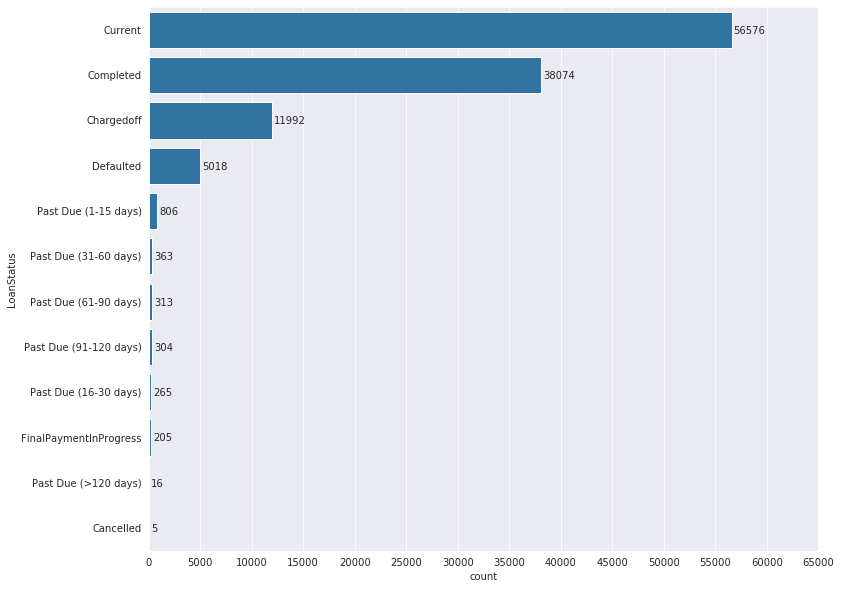

In [19]:
# Use seaborn.countplot to create a bar plot showing loan counts of all LoanStatus codes

# https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
plt.figure(figsize=(12,10))
plot_barh = sb.countplot(data=df_loan, y='LoanStatus', order=df_loan.LoanStatus.value_counts().index, orient='h', color=sb.color_palette()[0])
plt.xticks(np.arange(0, 70000, 5000))

for barh in plot_barh.patches:
    plt.annotate("%.0f" % barh.get_width(), (barh.get_x() + barh.get_width(), barh.get_y()), xytext=(2, -22), textcoords='offset points')

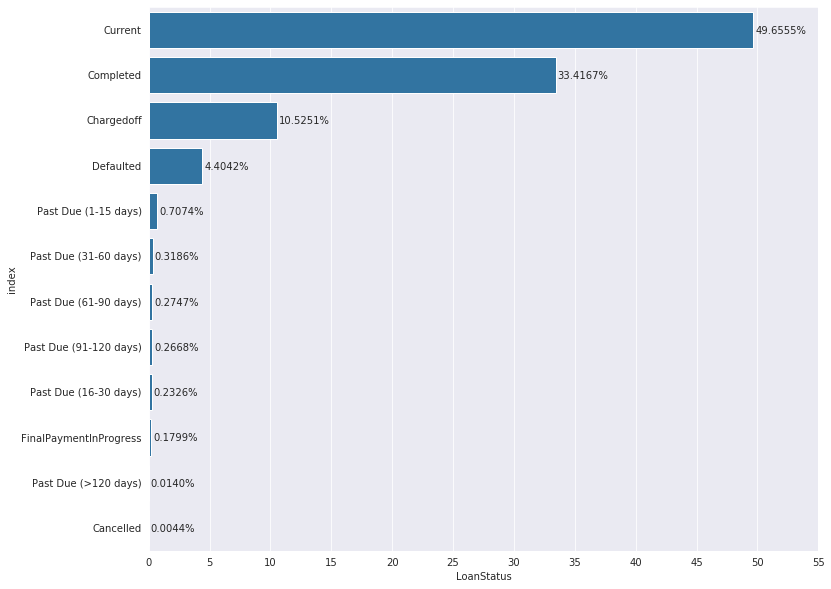

In [20]:
# Use seaborn.barplot to create a bar plot showing percent proportions of all LoanStatus codes
plt.figure(figsize=(12,10))
plot_barh = sb.barplot(data=(df_loan.LoanStatus.value_counts(normalize=True)*100).reset_index(), x='LoanStatus', y='index', orient='h', color=sb.color_palette()[0])
plt.xticks(np.arange(0, 60, 5))

for barh in plot_barh.patches:
    plt.annotate('{0:.4f}%'.format(barh.get_width()), (barh.get_x() + barh.get_width(), barh.get_y()), xytext=(2, -22), textcoords='offset points')

There are 11,992 loans which were considered "Chargedoff", and 5,018 loans which were labeled as "Defaulted". If we convert these loan counts to percent proportions, this would mean the overall "Chargedoff" rate is 10.5251%, and the overall "Defaulted" rate is 4.4042%.

Next we will check the distribution of the Boolean variables in the dataset.

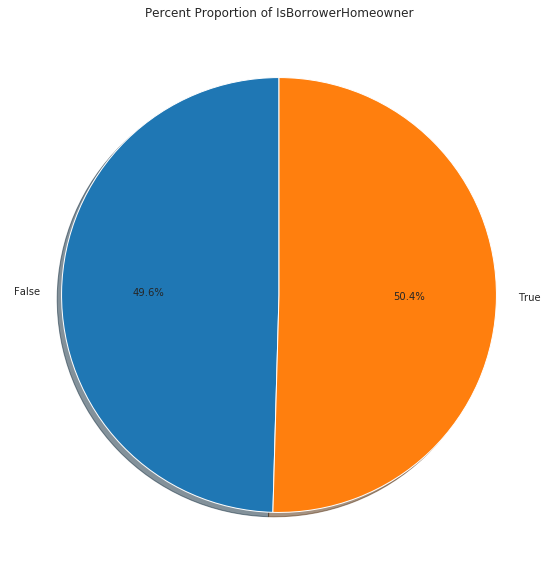

In [21]:
# Use a pie chart to show the percent proportions of 'IsBorrowerHomeowner'
df_loan.groupby(['IsBorrowerHomeowner']).size().plot(kind='pie', figsize=(12,10), legend=False, title='Percent Proportion of IsBorrowerHomeowner', ylabel='', labels=['False', 'True'], autopct='%1.1f%%', shadow=True, startangle=90);

Looks like it's almost a 50-50 chance for whether a borrower in the dataset is a home owner or not.

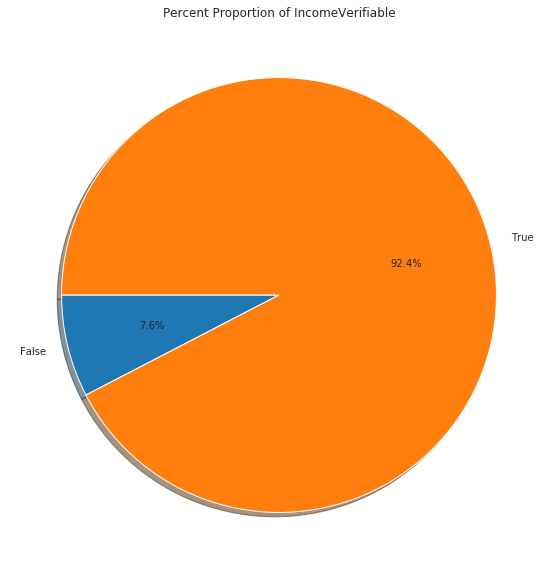

In [22]:
# Use a pie chart to show the percent proportions of 'IncomeVerifiable'
df_loan.groupby(['IncomeVerifiable']).size().plot(kind='pie', figsize=(12,10), legend=False, title='Percent Proportion of IncomeVerifiable', ylabel='', labels=['False', 'True'], autopct='%1.1f%%', shadow=True, startangle=180);

There are more than 90% of borrowers whose income information is considered verifiable. Notice that it is not required for a borrower to have the income information to be verifiable in order to post a loan listing.

Next we will check the distribution of the categorical variables in the dataset.

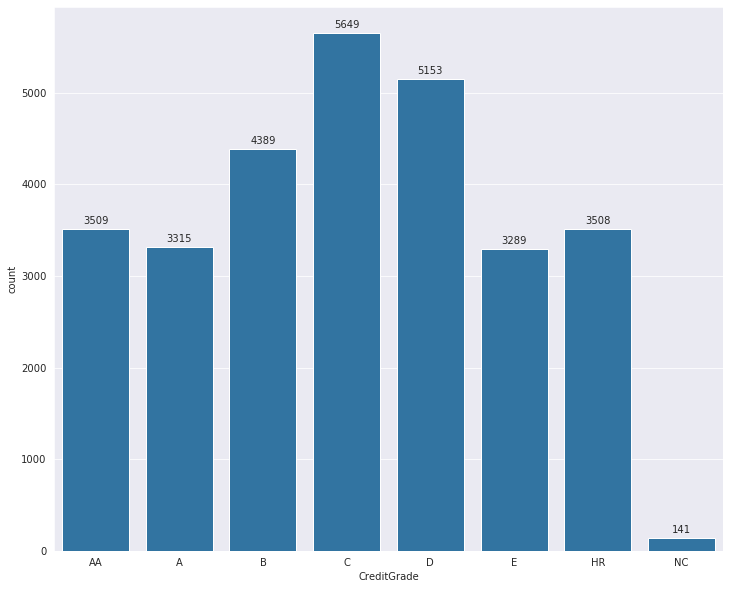

In [23]:
# Use seaborn.countplot to create a bar plot showing loan counts of all pre-200907 CreditGrade codes
plt.figure(figsize=(12,10))
plot_bar = sb.countplot(data=df_loan, x='CreditGrade', order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'], orient='v', color=sb.color_palette()[0])

for bar in plot_bar.patches:
    plt.annotate("%.0f" % bar.get_height(), (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha='center', xytext=(0, 5), textcoords='offset points')

The *CreditGrade* column represents the credit rating of a loan posting originated before July 2009. During this period, most of the loans were graded either C or D.

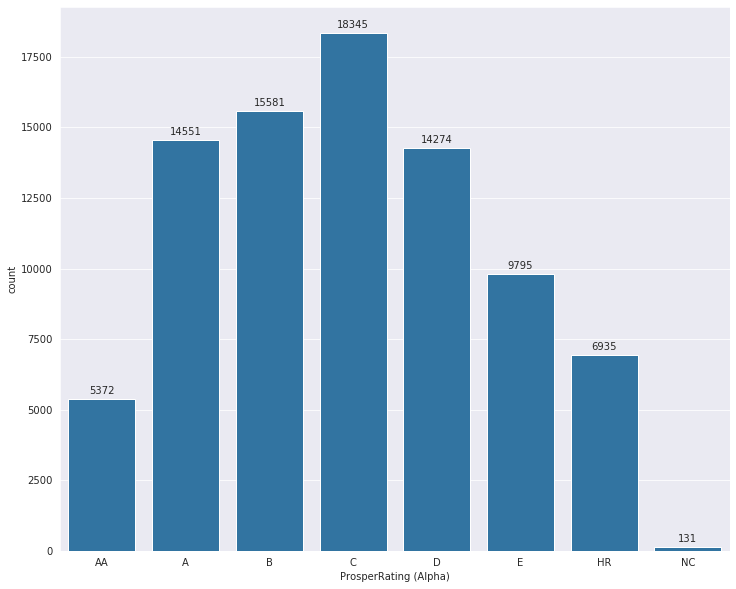

In [24]:
# Use seaborn.countplot to create a bar plot showing loan counts of all post-200907 ProsperRating codes
plt.figure(figsize=(12,10))
plot_bar = sb.countplot(data=df_loan, x='ProsperRating (Alpha)', order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'], orient='v', color=sb.color_palette()[0])

for bar in plot_bar.patches:
    plt.annotate("%.0f" % bar.get_height(), (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha='center', xytext=(0, 5), textcoords='offset points')

The *ProsperRating (Alpha)* column represents the credit rating of a loan posting originated from and after July 2009. In contrast to pre-2009 period, most of the loans were graded between A to D after [Prosper reopened their website](https://en.wikipedia.org/wiki/Prosper_Marketplace#2009_post_SEC_relaunch).

In [25]:
# The category of the listings that the borrowers selected when posting their listings: 
#    0 - Not Available
#    1 - Debt Consolidation
#    2 - Home Improvement
#    3 - Business
#    4 - Personal Loan
#    5 - Student Use
#    6 - Auto
#    7 - Other
#    8 - Baby&Adoption
#    9 - Boat
#    10 - Cosmetic Procedure
#    11 - Engagement Ring
#    12 - Green Loans
#    13 - Household Expenses
#    14 - Large Purchases
#    15 - Medical/Dental
#    16 - Motorcycle
#    17 - RV
#    18 - Taxes
#    19 - Vacation
#    20 - Wedding Loans

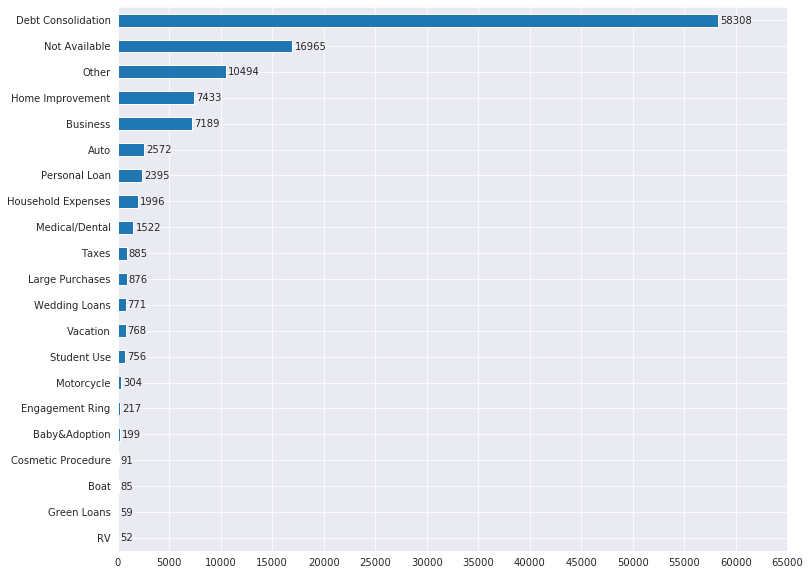

In [26]:
# Use pandas.DataFrame.plot to create a barh plot showing loan counts of all ListingCategory types

# Create a dictionary to store ListingCategory values
list_keys = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
list_values = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']
dict_listing_category = dict(zip(list_keys, list_values))

df_barh = pd.DataFrame(
    data = {'count': df_loan['ListingCategory (numeric)'].value_counts().tolist()}, 
    index = [dict_listing_category[i] for i in df_loan['ListingCategory (numeric)'].value_counts().index]
)

plot_barh = df_barh.plot(kind="barh", figsize=(12,10), legend=False)

# https://stackoverflow.com/questions/29511645/pandas-plot-x-or-index-column-in-descending-order
plt.gca().invert_yaxis()

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(np.arange(0, 70000, 5000))

for barh in plot_barh.patches:
    plt.annotate("%.0f" % barh.get_width(), (barh.get_x() + barh.get_width(), barh.get_y()), xytext=(2, -10), textcoords='offset points')

There are 58,308 loans which the borrowers selected 'Debt Consolidation' as their purposes, and these loans took 51.1756% of the total loans. Also, notice there are also sizeable numbers of loans using 'Not Available' and 'Other' as their purposes, which is similar to anonymizing the loan purposes.

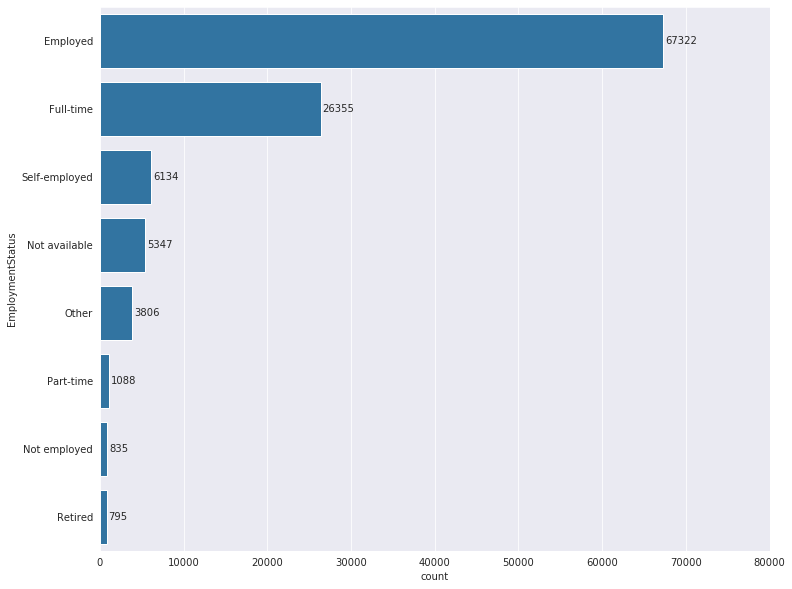

In [27]:
# Use seaborn.countplot to create a bar plot showing loan counts of all employment status types
plt.figure(figsize=(12,10))
plot_barh = sb.countplot(data=df_loan, y='EmploymentStatus', order=df_loan.EmploymentStatus.value_counts().index, orient='h', color=sb.color_palette()[0])
plt.xticks(np.arange(0, 85000, 10000), horizontalalignment="center", rotation=0)

for barh in plot_barh.patches:
    plt.annotate("%.0f" % barh.get_width(), (barh.get_x() + barh.get_width(), barh.get_y()), xytext=(2, -30), textcoords='offset points')

The *EmploymentStatus* column contains some overlapping information about a borrower's employment status when the loan posting was created. The "Employed" status essentially covers all employment status types by its own meaning, and it is too vague to be used as a way to outline the status of a borrower. However, the date of the first loan posting using these different *EmploymentStatus* codes may give us some hints.

In [28]:
print(df_loan.query('EmploymentStatus == "Employed"').LoanOriginationDate.min())
print(df_loan.query('EmploymentStatus == "Full-time"').LoanOriginationDate.min())
print(df_loan.query('EmploymentStatus == "Self-employed"').LoanOriginationDate.min())
print(df_loan.query('EmploymentStatus == "Not available"').LoanOriginationDate.min())
print(df_loan.query('EmploymentStatus == "Other"').LoanOriginationDate.min())
print(df_loan.query('EmploymentStatus == "Part-time"').LoanOriginationDate.min())
print(df_loan.query('EmploymentStatus == "Not employed"').LoanOriginationDate.min())
print(df_loan.query('EmploymentStatus == "Retired"').LoanOriginationDate.min())

2010-08-03
2007-02-16
2007-02-21
2006-02-23
2010-08-10
2007-02-20
2007-02-22
2007-02-21


Unlike other employment status codes, both "Employed" and "Other" were being adopted by Prosper starting from August 2010 (after Prosper reopened their website). This means Prosper decided to let the borrowers to give less personal info when applying for a loan, and 67,322 borrowers in total decided to benefit from this freedom.

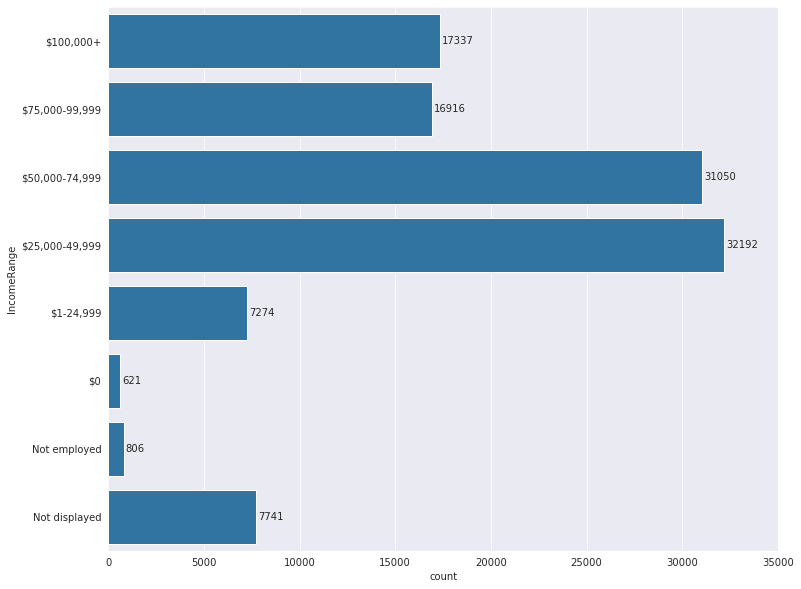

In [29]:
# Use seaborn.countplot to create a bar plot showing loan counts of all income ranges
plt.figure(figsize=(12,10))
plot_barh = sb.countplot(data=df_loan, y='IncomeRange', order=['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed', 'Not displayed'], orient='h', color=sb.color_palette()[0])
plt.xticks(np.arange(0, 40000, 5000), horizontalalignment="center", rotation=0)

for barh in plot_barh.patches:
    plt.annotate("%.0f" % barh.get_width(), (barh.get_x() + barh.get_width(), barh.get_y()), xytext=(2, -30), textcoords='offset points')

The *IncomeRange* column showed that most of the loan postings were coming from the borrowers with low to moderate incomes. There are 32,192 loans with the borrowers' income range between 25,000-49,999 USD, and 31,050 loans with the borrowers' income range between 50,000-74,999 USD.

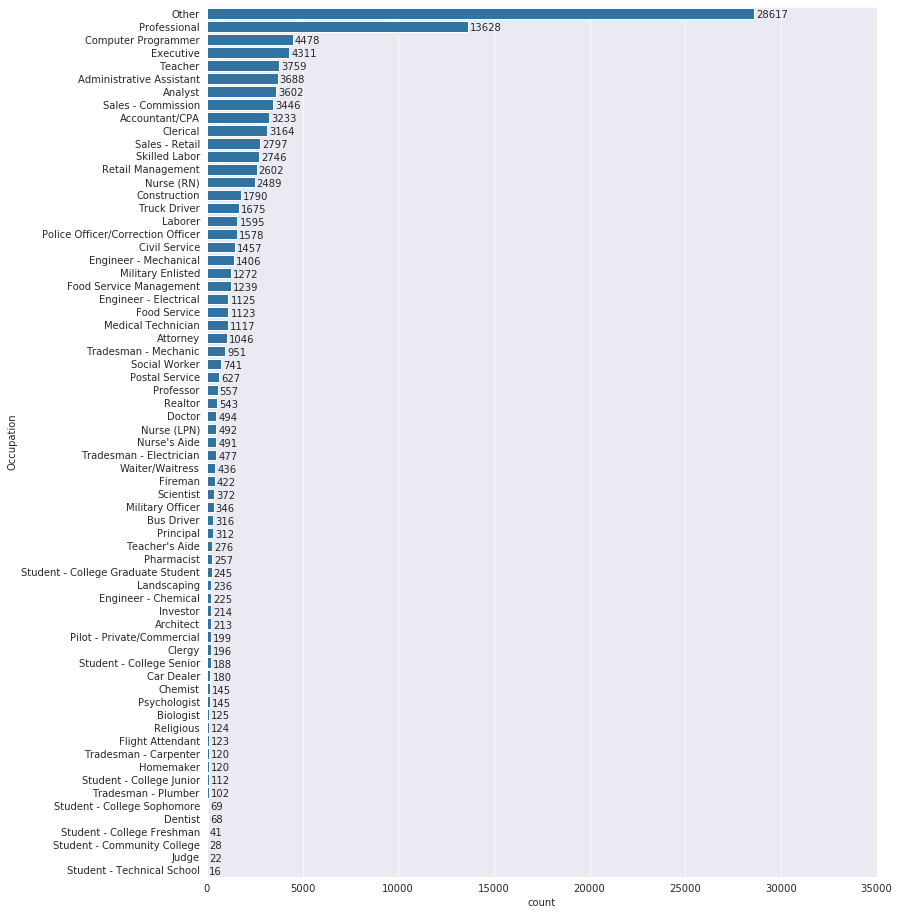

In [30]:
# Use seaborn.countplot to create a bar plot showing loan counts of all occupation types
plt.figure(figsize=(12,16))
plot_barh = sb.countplot(data=df_loan, y='Occupation', order=df_loan.Occupation.value_counts().index, orient='h', color=sb.color_palette()[0])
plt.xticks(np.arange(0, 40000, 5000), horizontalalignment="center", rotation=0)

for barh in plot_barh.patches:
    plt.annotate("%.0f" % barh.get_width(), (barh.get_x() + barh.get_width(), barh.get_y()), xytext=(2, -10), textcoords='offset points')

The *Occupation* column contains detailed information of a borrower's actual job type. Notice there are some occupations such as "Other" and "Professional" that are inexact, and unlike the value "Employed" in the *EmploymentStatus* column, the number of the borrowers who chose to hide their occupations is not as significant.

Finally we will check the distribution of the numerical variables in the dataset.

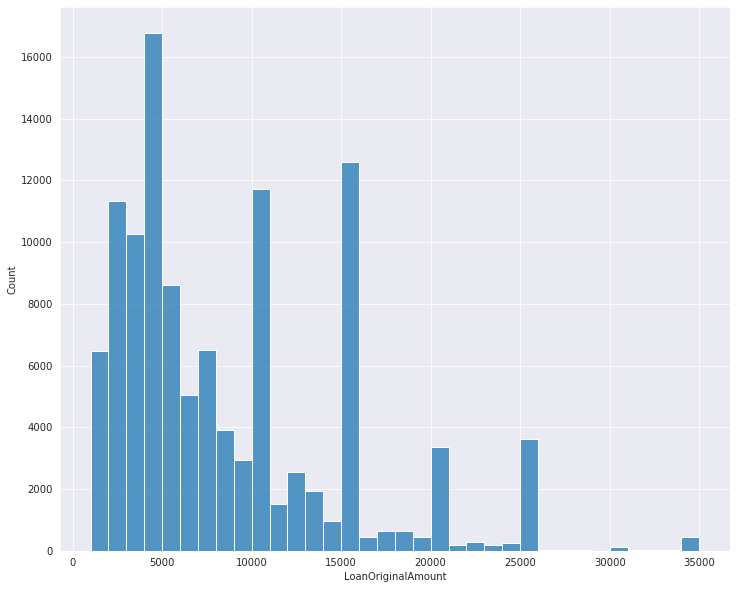

In [31]:
# Use seaborn.histplot to create a histogram showing loan count distributions of binned LoanOriginalAmount
plt.figure(figsize=(12,10))
sb.histplot(data=df_loan, x='LoanOriginalAmount', binwidth=1000);

There are three peaks in the histogram of the *LoanOriginalAmount* column, namely

- 2,000-5,000
- 10,000-11,000
- 15,000-16,000

, indicating these may be the typical origination amounts of the loan in Prosper marketplace.

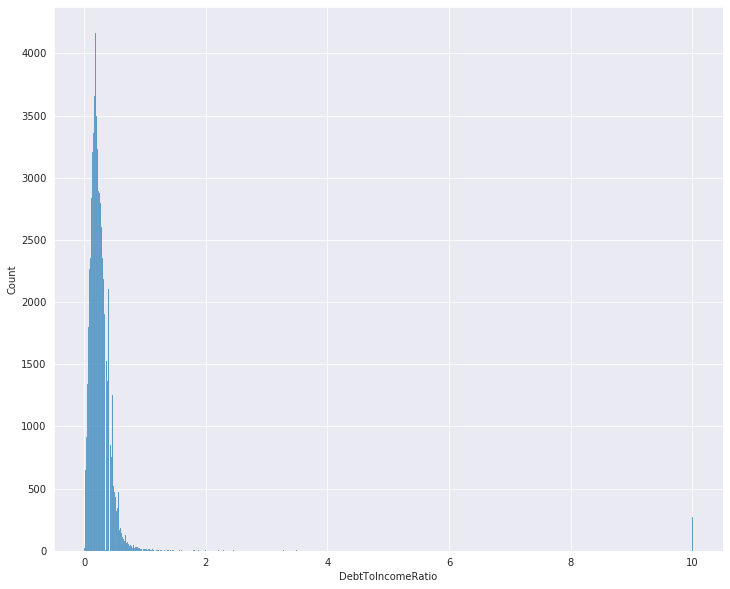

In [32]:
# Use seaborn.histplot to create a histogram showing loan count distributions of binned DebtToIncomeRatio
plt.figure(figsize=(12,10))
sb.histplot(data=df_loan, x='DebtToIncomeRatio', binwidth=0.01);

The histogram of the *DebtToIncomeRatio* column showed a wide blank area in x-axis. We will try to divide the original plot to two separate subplots, one with DebtToIncomeRatio <= 1 and another with DebtToIncomeRatio > 1.

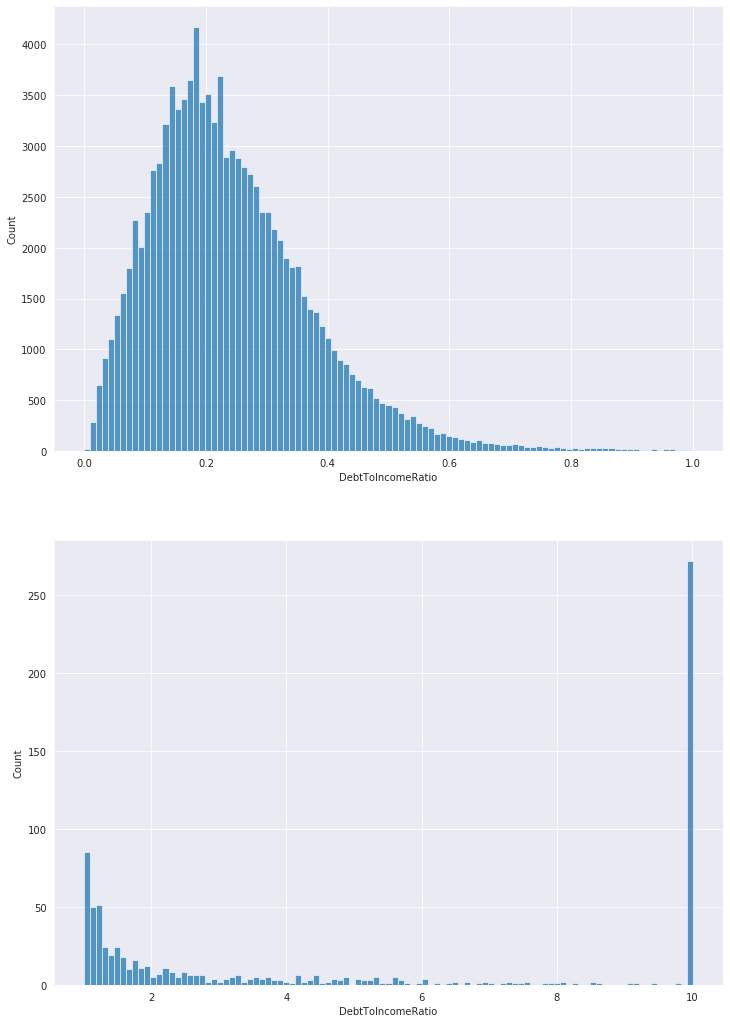

In [33]:
plt.figure(figsize=(12,18))
plt.subplot(2, 1, 1)
sb.histplot(data=df_loan.query('DebtToIncomeRatio <= 1'), x='DebtToIncomeRatio', stat='count', bins=101);
plt.subplot(2, 1, 2)
sb.histplot(data=df_loan.query('DebtToIncomeRatio > 1'), x='DebtToIncomeRatio', stat='count', bins=101);

The first subplot showed most of the loans have a DebtToIncomeRatio less than or equal to 1, with the peak of the distribution situated between 0.1 to 0.3. The second plot showed there relatively few loans which have a DebtToIncomeRatio greater than 1, meaning that most of the borrowers are aware of controlling their debt-to-income ratio when applying for a loan.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There are 272 loans with their DebtToIncomeRatio equal to 10.01, this is because Prosper will internally process any debt to income ratio larger than 1000% to make them returned as a capped value of 1001%.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

We would create a lite version of the current *LoanStatus* variable and use it as the main variable of interest in the rest of the report. The motivation of this adjustment is provided below.

After checking the online docs of the [Prosper API](https://developers.prosper.com/docs/investor/loans-api/), it seems that some of loan status codes could be further reduced to make the *LoanStatus* column simplified. But before we wrangle this variable, we will see the loan status definition of the current API first:

[![](prosper_api.jpg)](prosper_api.jpg)

We can see there are only 6 loan status codes in use ("5 = FINALPAYMENTINPROGRESS" is officially declared as deprecated), instead of the 12 possible *LoanStatus* values in the dataset. All the "Past Due" loan status codes would be considered as "Defaulted" in the current API, with the default reason marked as "1 = Delinquency", making the representation of *LoanStatus* cleaner and easier to understand. 

However, there is no clear explanation about why "FinalPaymentInProgress" is marked as deprecated, but we can still try to figure it out by doing some reasoning:

- Because the borrower of the loan is preparing to make the final payment, the loan can be considered as "Current"
- Since the borrower of the loan has successfully made all payments so far, the loan can be (optimistically) considered as "Completed"

In this project, "FinalPaymentInProgress" can be counted toward either "Current" or "Completed", as these status codes would have no effect to our analysis.

In [34]:
# Create a simplified version of loan status codes based on the official API docs
# Skip this code cell completely if you do not want to apply the wrangling process
df_loan = df_loan.rename(columns={'LoanStatus':'LoanStatus_Original'})
df_loan['LoanStatus'] = df_loan['LoanStatus_Original']

# Relabel all "Past Due" to "Defaulted", since these status codes are now obsolete
df_loan.loc[df_loan['LoanStatus'].str.contains('Past') == True, 'LoanStatus'] = 'Defaulted'

# The loan status code "FinalPaymentInProgress" is now officially deprecated, and would be counted toward "Current"
df_loan.loc[df_loan['LoanStatus'].str.fullmatch('FinalPaymentInProgress') == True, 'LoanStatus'] = 'Current'

And following are the same plots we created earlier for the *LoanStatus* variable, but this time we will use the lite version of the same variable instead.

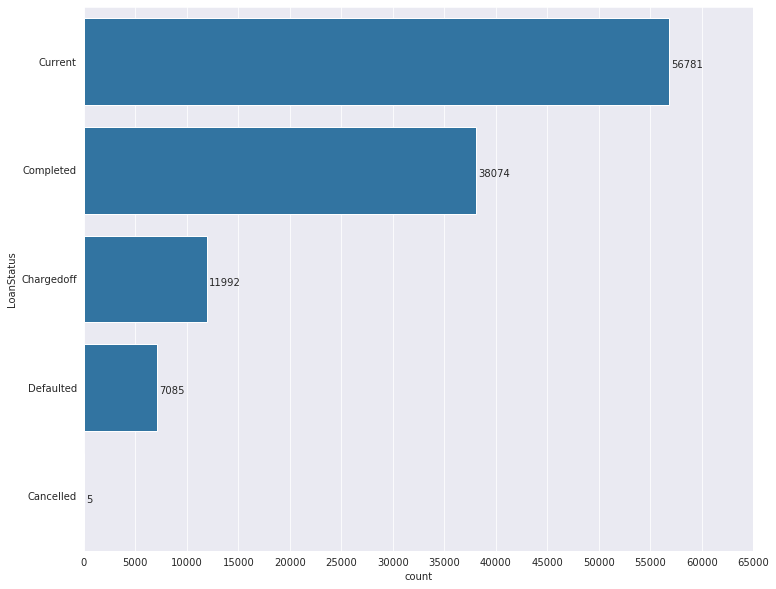

In [35]:
plt.figure(figsize=(12,10))
plot_barh = sb.countplot(data=df_loan, y='LoanStatus', order=df_loan.LoanStatus.value_counts().index, orient='h', color=sb.color_palette()[0])
plt.xticks(np.arange(0, 70000, 5000))

for barh in plot_barh.patches:
    plt.annotate("%.0f" % barh.get_width(), (barh.get_x() + barh.get_width(), barh.get_y()), xytext=(2, -50), textcoords='offset points')

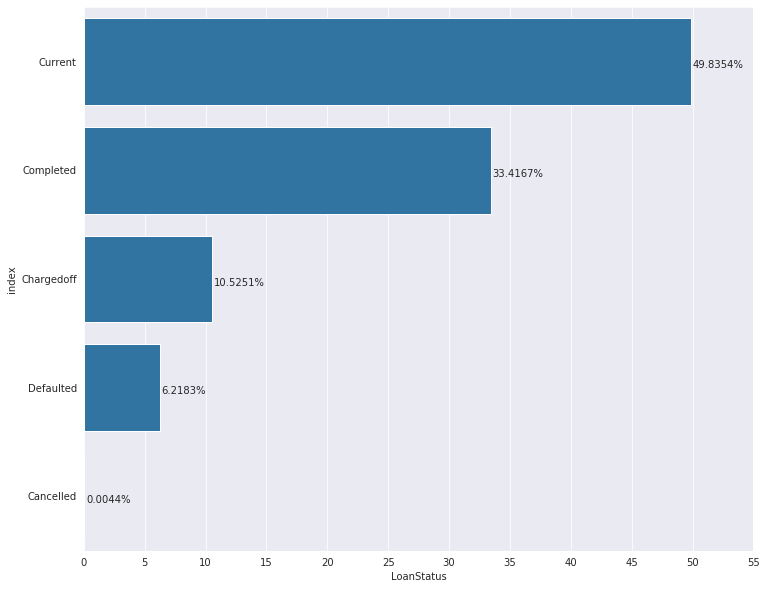

In [36]:
plt.figure(figsize=(12,10))
plot_barh = sb.barplot(data=(df_loan.LoanStatus.value_counts(normalize=True)*100).reset_index(), x='LoanStatus', y='index', orient='h', color=sb.color_palette()[0])
plt.xticks(np.arange(0, 60, 5))

for barh in plot_barh.patches:
    plt.annotate('{0:.4f}%'.format(barh.get_width()), (barh.get_x() + barh.get_width(), barh.get_y()), xytext=(2, -50), textcoords='offset points')

## Bivariate Exploration

In this section we will inspect the relationships between the overall chargedoff/defaulted rates and various features of the loans we introduced earlier.

We will start from the Boolean variables in the dataset, just like what we did in the previous section.

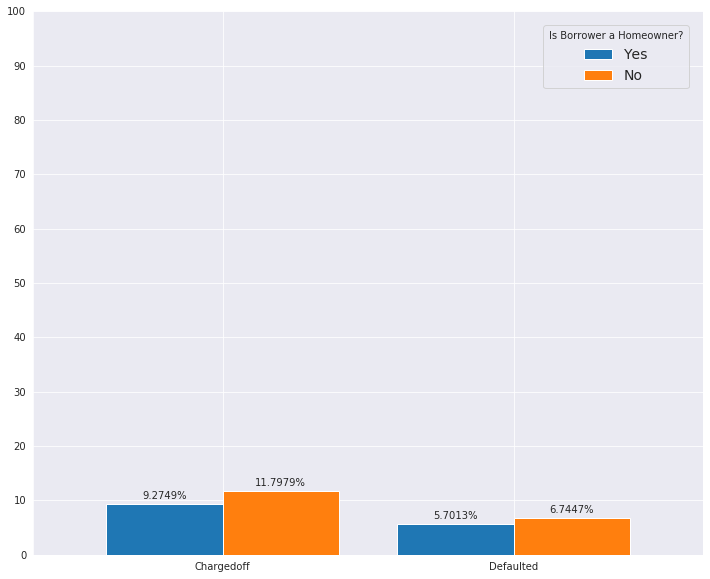

In [37]:
bar_y = [
    (df_loan.query('IsBorrowerHomeowner == True & LoanStatus == "Chargedoff"').shape[0] / df_loan.query('IsBorrowerHomeowner == True').shape[0]) * 100, 
    (df_loan.query('IsBorrowerHomeowner == True & LoanStatus == "Defaulted"').shape[0] / df_loan.query('IsBorrowerHomeowner == True').shape[0]) * 100
]

bar_n = [
    (df_loan.query('IsBorrowerHomeowner == False & LoanStatus == "Chargedoff"').shape[0] / df_loan.query('IsBorrowerHomeowner == False').shape[0]) * 100, 
    (df_loan.query('IsBorrowerHomeowner == False & LoanStatus == "Defaulted"').shape[0] / df_loan.query('IsBorrowerHomeowner == False').shape[0]) * 100
]

df_bar = pd.DataFrame({'True': bar_y, 'False': bar_n}, index=['Chargedoff', 'Defaulted'])
plot_bar = df_bar.plot(kind="bar", figsize=(12,10), width=0.8) # bar width can be changed by adding width=x to the argument list

plt.legend(labels=['Yes', 'No'], loc='best', bbox_to_anchor=(1.0, 1.0), fontsize=14, title="Is Borrower a Homeowner?", borderaxespad=1)
plt.xticks(horizontalalignment="center", rotation=0)
plt.yticks(np.arange(0, 101, 10))

for bar in plot_bar.patches:
    plt.annotate('{0:.4f}%'.format(bar.get_height()), (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha='center', xytext=(0, 5), textcoords='offset points')

It is confirmed that the borrowers who are not a homeowner are more likely to fail to repay their loans, though the overall rate differences are not very significant.

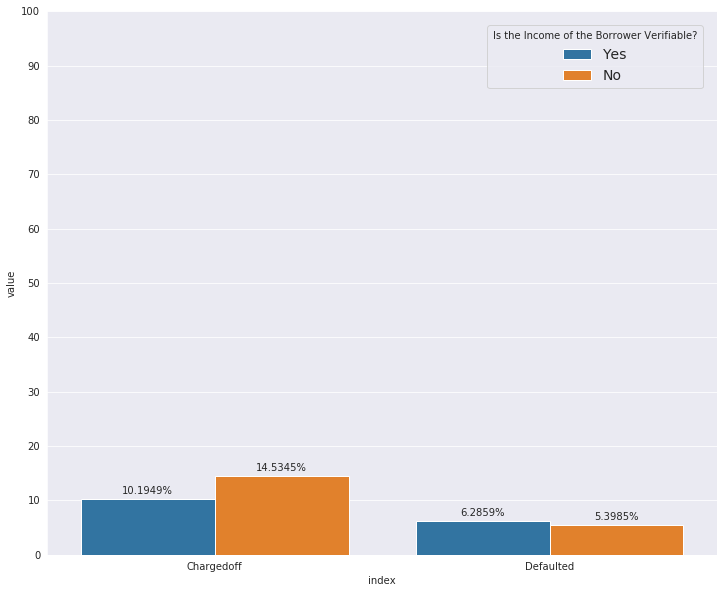

In [38]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
# When using seaborn to create a clustered bar plot, check the following requirements before proceeding
# *. countplot() can only assign either x or y, but not both. Use barplot() instead when x and y need explicit assignment
# *. If you are using x, y, hue to define a plot, then you need to arrange the DataFrame in **long** format
# (DataFrame format similar to the one in Project 2 before applying .pivot() to the match_result column)
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
# Some examples of DataFrames in long/wide format
# https://www.journaldev.com/33398/pandas-melt-unmelt-pivot-function
# https://hausetutorials.netlify.app/posts/2020-05-17-reshape-python-pandas-dataframe-from-long-to-wide-with-pivottable/

incomeverify_y = [
    (df_loan.query('IncomeVerifiable == True & LoanStatus == "Chargedoff"').shape[0] / df_loan.query('IncomeVerifiable == True').shape[0]) * 100, 
    (df_loan.query('IncomeVerifiable == True & LoanStatus == "Defaulted"').shape[0] / df_loan.query('IncomeVerifiable == True').shape[0]) * 100
]

incomeverify_n = [
    (df_loan.query('IncomeVerifiable == False & LoanStatus == "Chargedoff"').shape[0] / df_loan.query('IncomeVerifiable == False').shape[0]) * 100, 
    (df_loan.query('IncomeVerifiable == False & LoanStatus == "Defaulted"').shape[0] / df_loan.query('IncomeVerifiable == False').shape[0]) * 100
]

df_bar = pd.DataFrame({'True': incomeverify_y, 'False': incomeverify_n}, index=['Chargedoff', 'Defaulted'])

plt.figure(figsize=(12,10))
# Unpivot a DataFrame from wide to long format
plot_bar = sb.barplot(data=pd.melt(df_bar.reset_index(), id_vars = ['index'], value_vars = ['True', 'False']), x='index', y='value', hue='variable')
# Notice : Unlike Matplotlib, there is no easy way to change the width of bars in the created plot
# The **hard** way to change the width needs to change both the bar width and the bar x-coordinate

# The bad news is, seaborn is not as user-friendly as Matplotlib when you need to add a legend to a bar plot
# You will have to use both the handles and labels of the ax object to set the label text you want
# (If you omit the handles and use plt.legend() as usual, you will end up with legend items with color disappeared)
# https://stackoverflow.com/questions/53734332/seaborn-barplot-legend-labels-lose-color
h, l = plot_bar.get_legend_handles_labels()
l = ['Yes', 'No']
plt.legend(handles=h, labels=l, loc='best', bbox_to_anchor=(1.0, 1.0), fontsize=14, title="Is the Income of the Borrower Verifiable?", borderaxespad=1)
plt.yticks(np.arange(0, 101, 10))

for bar in plot_bar.patches:
    plt.annotate('{0:.4f}%'.format(bar.get_height()), (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha='center', xytext=(0, 5), textcoords='offset points')

The relationship between overall chargedoff rate and verifiable incomes is anticipated, but the overall defaulted rate shows a different story. Perhaps this is due to the difference between a home and an income source: the former is an asset, and the latter may or may not be an asset (income sources could be a job, an investment, a property transfer, etc.), making this feature less reliable than the ownership of a home.

Next we will inspect relations between the overall chargedoff/defaulted rates and the categorical variables in the dataset.

In [39]:
# Check the current default colormap settings before plotting a heatmap
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# https://seaborn.pydata.org/tutorial/color_palettes.html
# Possible default colormaps:
# *. 'viridis' (default setting of Matplotlib)
# *. 'rocket' (after applying seaborn.set_style() with a preconfigured style)
plt.rcParams['image.cmap']

'rocket'

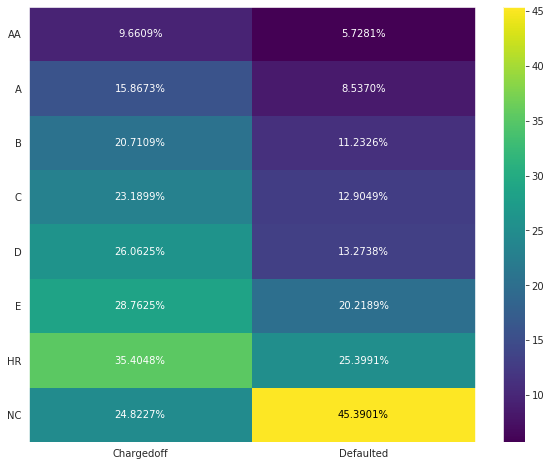

In [40]:
# Creating annotated heatmaps with Matplotlib, the hard way (when comparing with seaborn.heatmap())
# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

credit_grade = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
loan_status = ['Chargedoff', 'Defaulted']

list_c = []
list_d = []

for i in credit_grade:
    # Convert fractions to percents by multiplying each fraction value by 100
    # Notice : tick scales in colorbar will be implicitly calculated by initial data used to create the plot
    # By using appropriate number formats, we can skip the task to manually configure yticklabels :)
    list_c.append(df_loan.query('CreditGrade == "{}" & LoanStatus == "Chargedoff"'.format(i)).shape[0] / df_loan.query('CreditGrade == "{}"'.format(i)).shape[0] * 100)
    list_d.append(df_loan.query('CreditGrade == "{}" & LoanStatus == "Defaulted"'.format(i)).shape[0] / df_loan.query('CreditGrade == "{}"'.format(i)).shape[0] * 100)

# https://stackoverflow.com/questions/53677396/python-numpy-array-creation-from-multiple-lists
default_rate = np.column_stack([list_c, list_d])

fig, ax = plt.subplots(figsize=(10,8))

# https://stackoverflow.com/questions/10540929/figure-of-imshow-is-too-small
im = ax.imshow(default_rate, cmap="viridis", aspect='auto')

# https://stackoverflow.com/questions/50543885/how-to-remove-grid-lines-on-image-in-python/50652936
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
plt.grid(None)

# Make all ticks and labels display in the plot
ax.set_xticks(np.arange(len(loan_status)))
ax.set_yticks(np.arange(len(credit_grade)))
ax.set_xticklabels(loan_status)
ax.set_yticklabels(credit_grade)

# Loop over data dimensions and create text annotations.
for i in range(len(credit_grade)):
    for j in range(len(loan_status)):
        text = ax.text(j, i, '{0:.4f}%'.format(default_rate[i, j]), ha="center", va="center", color=("black", "white")[int(im.norm(default_rate[i, j]) < im.norm(default_rate.max())/1.2)])
        # The **magic** code to change text color is borrowed from "Using the helper function code style" paragraph
        # https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
        # Notice that by tweaking either the direction of comparison operator (<) or the denominator value of threshold (1.2), 
        # it is usually possible to adjust the text colors to the style we wish to see in the plot

cbar = ax.figure.colorbar(im, ax=ax)
plt.show()

Loans originated before July 2009 suffered from high chargedoff/defaulted rates (even loans with "AA" credit grade have a 9.6609% overall chargedoff rate), and these rates skyrocketed as the credit ratings of loans moved downward. The poor loan performance forced Prosper to obtain SEC registration for its loans and relaunch their service in July 2009.

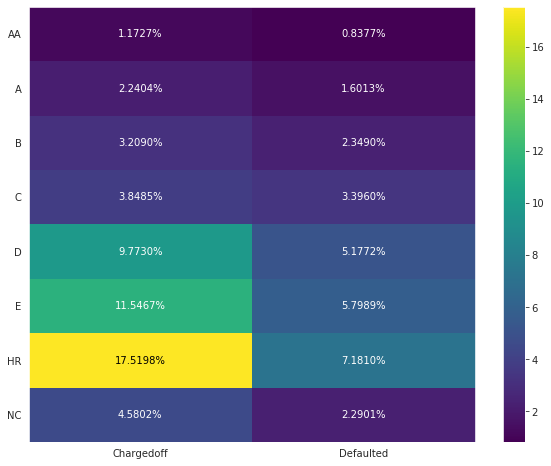

In [41]:
prosper_rating = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
loan_status = ['Chargedoff', 'Defaulted']

list_c = []
list_d = []

for i in prosper_rating:
    list_c.append(df_loan.loc[(df_loan['ProsperRating (Alpha)'] == "{}".format(i)) & (df_loan['LoanStatus'] == "Chargedoff")].shape[0] / df_loan.loc[df_loan['ProsperRating (Alpha)'] == "{}".format(i)].shape[0] * 100)
    list_d.append(df_loan.loc[(df_loan['ProsperRating (Alpha)'] == "{}".format(i)) & (df_loan['LoanStatus'] == "Defaulted")].shape[0] / df_loan.loc[df_loan['ProsperRating (Alpha)'] == "{}".format(i)].shape[0] * 100)

default_rate = np.column_stack([list_c, list_d])

fig, ax = plt.subplots(figsize=(10,8))

im = ax.imshow(default_rate, cmap="viridis", aspect='auto')

plt.grid(None)

ax.set_xticks(np.arange(len(loan_status)))
ax.set_yticks(np.arange(len(prosper_rating)))
ax.set_xticklabels(loan_status)
ax.set_yticklabels(prosper_rating)

for i in range(len(prosper_rating)):
    for j in range(len(loan_status)):
        text = ax.text(j, i, '{0:.4f}%'.format(default_rate[i, j]), ha="center", va="center", color=("black", "white")[int(im.norm(default_rate[i, j]) < im.norm(default_rate.max())/1.2)])

cbar = ax.figure.colorbar(im, ax=ax)
plt.show()

Starting from July 2009, the overall chargedoff/defaulted rates of originated loans were pacified - at least for loans with moderate to good credit ratings (AA to C). For loans with lower credit ratings (D and below), they are still prone to defaults.

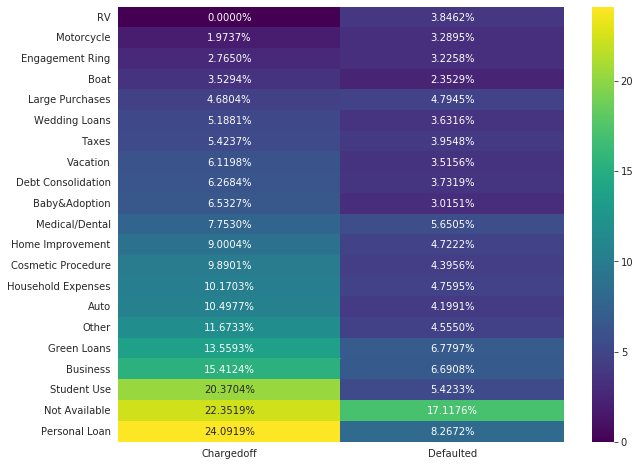

In [42]:
# Creating annotated heatmaps with seaborn.heatmap()
listing_category = df_loan['ListingCategory (numeric)'].value_counts().index
loan_status = ['Chargedoff', 'Defaulted']

list_c = []
list_d = []

for i in listing_category:
    list_c.append(df_loan.query('`ListingCategory (numeric)` == {} & LoanStatus == "Chargedoff"'.format(i)).shape[0] / df_loan.query('`ListingCategory (numeric)` == {}'.format(i)).shape[0] * 100)
    list_d.append(df_loan.query('`ListingCategory (numeric)` == {} & LoanStatus == "Defaulted"'.format(i)).shape[0] / df_loan.query('`ListingCategory (numeric)` == {}'.format(i)).shape[0] * 100)

# Sort the data in the DataFrame before plotting
default_rate = pd.DataFrame({'Chargedoff': list_c, 'Defaulted': list_d}, index=[dict_listing_category[i] for i in listing_category]).sort_index().sort_values(by=loan_status)

plt.figure(figsize=(10,8))
ax = sb.heatmap(default_rate, cmap="viridis", annot=True, fmt='.4f')
# Notice how seaborn "automagically" changes the annotated text colors to coordinate with different background colors

for t in ax.texts: t.set_text(t.get_text() + '%')

For loans that seem to come from borrowers with stronger financial strength (eg. buying vehicles, wedding/engagement, vacation, etc.), it is expected to see these loans have a lower overall chargedoff/defaulted rate. However, also notice that loans with certain purposes may have an overall chargedoff rate higher than 20%, and these may be red flags for either Prosper or the investors.

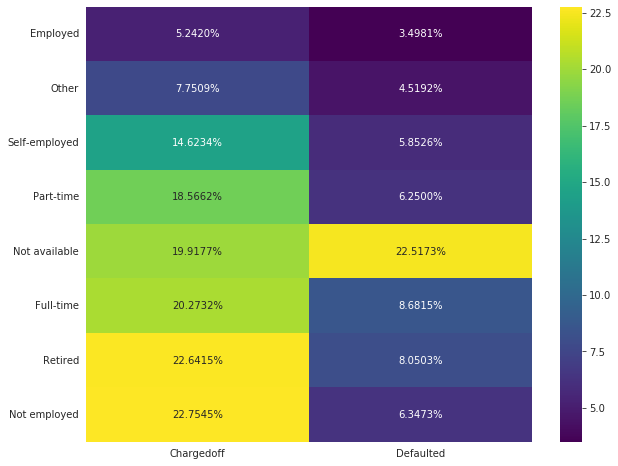

In [43]:
# We can prepare the list in a programmatic way because this column is NOT an ordinal categorical variable
employment_status = df_loan.EmploymentStatus.value_counts().reset_index()['index'].tolist()
loan_status = ['Chargedoff', 'Defaulted']

list_c = []
list_d = []

for i in employment_status:
    list_c.append(df_loan.query('EmploymentStatus == "{}" & LoanStatus == "Chargedoff"'.format(i)).shape[0] / df_loan.query('EmploymentStatus == "{}"'.format(i)).shape[0] * 100)
    list_d.append(df_loan.query('EmploymentStatus == "{}" & LoanStatus == "Defaulted"'.format(i)).shape[0] / df_loan.query('EmploymentStatus == "{}"'.format(i)).shape[0] * 100)

default_rate = pd.DataFrame({'Chargedoff': list_c, 'Defaulted': list_d}, index=employment_status).sort_index().sort_values(by=loan_status)

plt.figure(figsize=(10,8))
ax = sb.heatmap(default_rate, cmap="viridis", annot=True, fmt='.4f')

for t in ax.texts: t.set_text(t.get_text() + '%')

Remember the "Employed" and "Other" types were introduced by Prosper after they reopened their website in July 2009, and these types would certainly have a lower overall chargedoff/defaulted rate. But also remember there are 67,322 borrowers who prefer not to specify their employment status by choosing "Employed" instead of other exact types. Due to these reasons we would consider this feature as a biased variable and would not investigate it further.

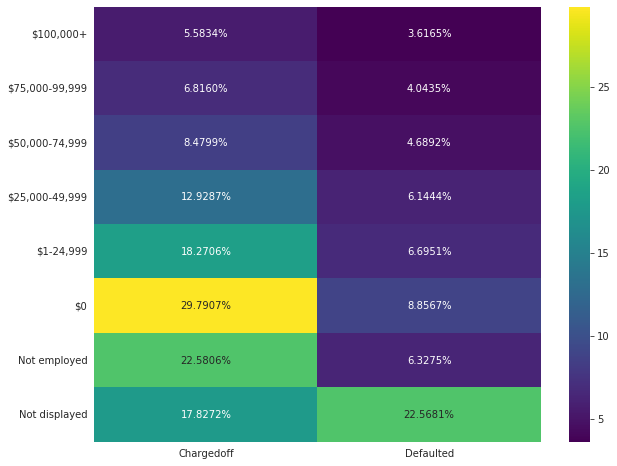

In [44]:
income_range = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed', 'Not displayed']
loan_status = ['Chargedoff', 'Defaulted']

list_c = []
list_d = []

for i in income_range:
    list_c.append(df_loan.query('IncomeRange == "{}" & LoanStatus == "Chargedoff"'.format(i)).shape[0] / df_loan.query('IncomeRange == "{}"'.format(i)).shape[0] * 100)
    list_d.append(df_loan.query('IncomeRange == "{}" & LoanStatus == "Defaulted"'.format(i)).shape[0] / df_loan.query('IncomeRange == "{}"'.format(i)).shape[0] * 100)

default_rate = pd.DataFrame({'Chargedoff': list_c, 'Defaulted': list_d}, index=income_range)

plt.figure(figsize=(10,8))
ax = sb.heatmap(default_rate, cmap="viridis", annot=True, fmt='.4f')

for t in ax.texts: t.set_text(t.get_text() + '%')

The *IncomeRange* variable, one of the features that closely describes the financial status of a borrower, displays a trend that is similar to the one we see in either the *CreditGrade* or the *ProsperRating (Alpha)* features. The overall chargedoff/defaulted rates arise as the income range of the borrowers move downward.

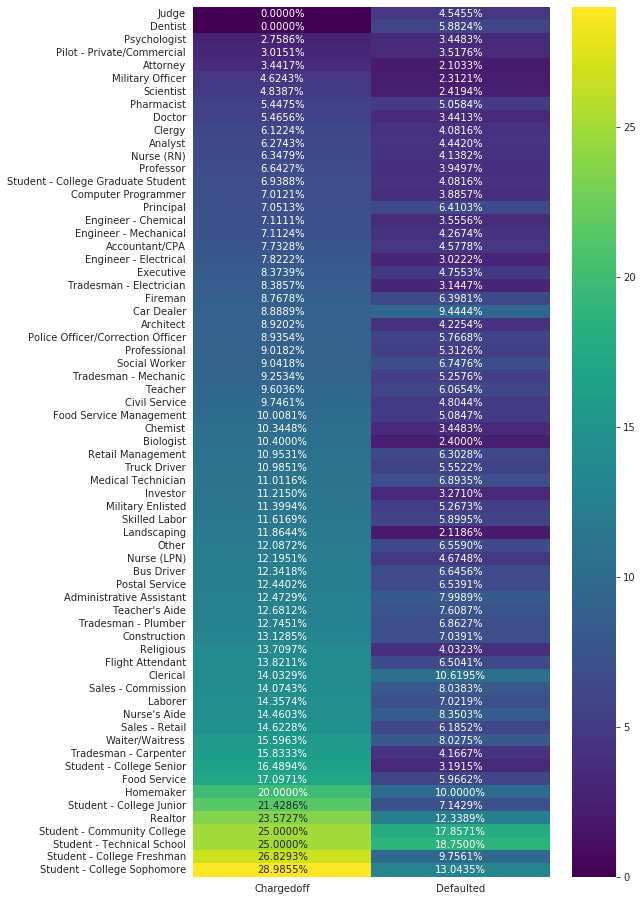

In [45]:
occupation = df_loan.Occupation.value_counts().reset_index()['index'].tolist()
loan_status = ['Chargedoff', 'Defaulted']

list_c = []
list_d = []

for i in occupation:
    list_c.append(df_loan.query('Occupation == "{}" & LoanStatus == "Chargedoff"'.format(i)).shape[0] / df_loan.query('Occupation == "{}"'.format(i)).shape[0] * 100)
    list_d.append(df_loan.query('Occupation == "{}" & LoanStatus == "Defaulted"'.format(i)).shape[0] / df_loan.query('Occupation == "{}"'.format(i)).shape[0] * 100)

default_rate = pd.DataFrame({'Chargedoff': list_c, 'Defaulted': list_d}, index=occupation).sort_index().sort_values(by=loan_status)

plt.figure(figsize=(8,16))
ax = sb.heatmap(default_rate, cmap="viridis", annot=True, fmt='.4f')

for t in ax.texts: t.set_text(t.get_text() + '%')

The long, detailed list of borrower occupation showed some interesting facts. On the top side of the spectrum, we can see Judges and Dentists have a brilliant overall chargedoff rate of 0%. And on the bottom side, we can see most of the occupations with an overall chargedoff rate higher than 20% are Students. Though this finding can serve as an instant warning signal for the investors, this may also imply some ongoing problem in the US society, as students in US are being plagued by the negative cycle of loan repayment.



Lastly we will inspect relations between the overall chargedoff/defaulted rates and the numerical variables in the dataset.

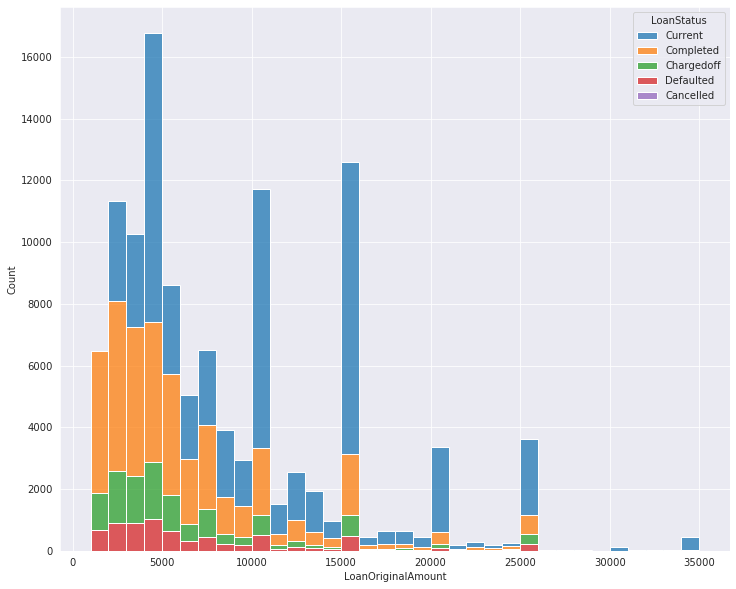

In [46]:
plt.figure(figsize=(12,10))
sb.histplot(data=df_loan, x='LoanOriginalAmount', hue='LoanStatus', stat='count', binwidth=1000, multiple='stack', hue_order = df_loan['LoanStatus'].value_counts().index.tolist());

It's interesting to see that most of the loans which have been labeled as chargedoff/defaulted have a loan amount value which falls in the range of 1,000 ~ 6,000 USD. Looks like the magnitude of the debt burden does not always connect to the likelihood of a borrower's failure to make payments regularly.

Also, notice there is no chargedoff/defaulted loan occurred when *LoanOriginalAmount* is greater than 25,000 USD.

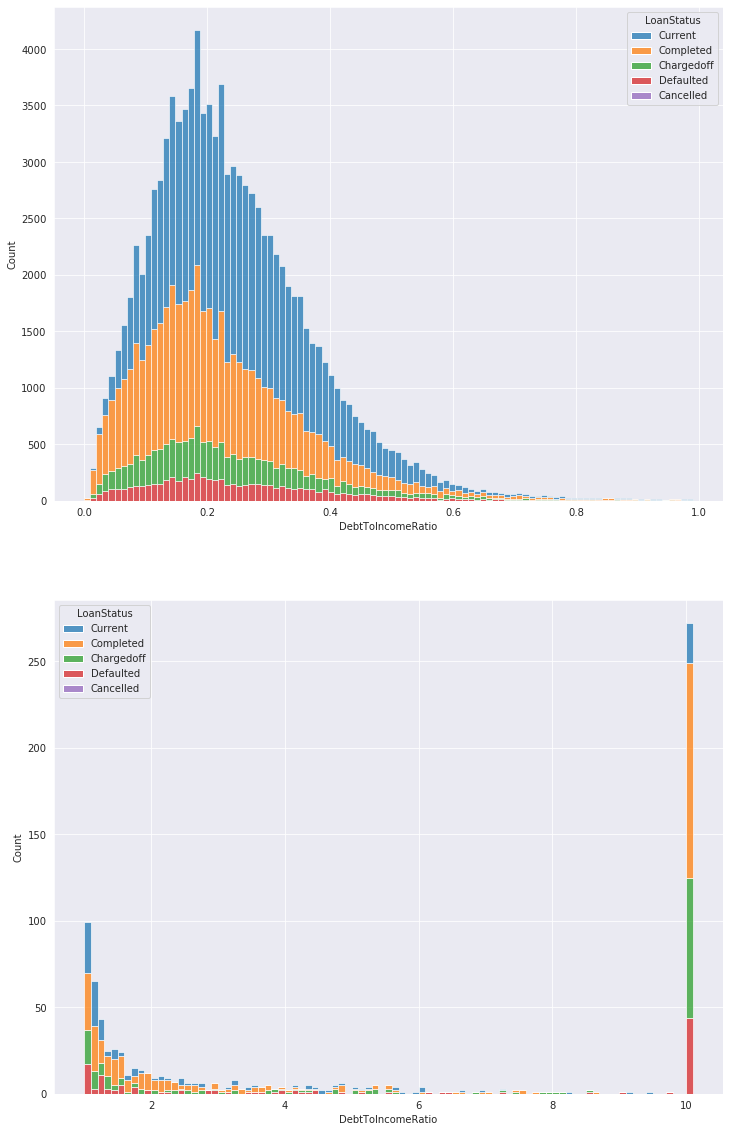

In [47]:
plt.figure(figsize=(12,20))
plt.subplot(2, 1, 1)
sb.histplot(data=df_loan.query('DebtToIncomeRatio < 1.0'), x='DebtToIncomeRatio', hue='LoanStatus', stat='count', bins=100, multiple='stack', hue_order = df_loan['LoanStatus'].value_counts().index.tolist());
plt.subplot(2, 1, 2)
sb.histplot(data=df_loan.query('DebtToIncomeRatio >= 1.0'), x='DebtToIncomeRatio', hue='LoanStatus', stat='count', bins=np.arange(1.0, 10.2, 0.1), multiple='stack', hue_order = df_loan['LoanStatus'].value_counts().index.tolist());

Most of the chargedoff/defaulted loans in the dataset have their *DebtToIncomeRatio* values lower than 0.5. It seems that this finding aligns with the finding of the *LoanOriginalAmount* variable we see earlier, indicating there is a possibility that most of the borrowers in Prosper marketplace are weak in financial strength - perhaps too weak to even successfully repay their debts.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

When analyzing relationships between chargedoff/defaulted rates and several categorical variables, we can confirm some of these variables return some results that could be predicted by the common sense. For example, both the occupations and the income ranges showed expected trend of chargedoff/defaulted rate variations, and it is notable to see features related to credit ratings support the results we observed. However, since these are overall rates, it would be prudent to observe how the chargedoff/defaulted rates change under various faceted conditions.

On the other hand, the analysis of numerical variables presented us with the implication that most of the borrowers in Prosper marketplace are likely to be financially weak, and this may not only be an overall outcome, but also be a recurring, persistent phenomenon. For now, the possible way to detect this situation still remains to be seen.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Although this has nothing to do with the chargedoff/defaulted rates and other features we selected, we still feel inclined to create a line chart to display the growth of loan listing counts of every year. Because unlike ordinary businesses, the growth of loan cases has meanings more than merely the possible success and revenue of Prosper - it can also be interpreted as the increase of people who are financially weak and cannot but borrow money to keep their lives going.

In [48]:
# Reset plot style from seaborn back to Matplotlib default (this may be better for line plots)
# https://stackoverflow.com/questions/26899310/python-seaborn-to-reset-back-to-the-matplotlib
# http://seaborn.pydata.org/generated/seaborn.reset_orig.html
sb.reset_orig()

In [49]:
# Extract year information from the LoanOriginationDate column
df_loan['LoanOriginationDate_Year'] = df_loan['LoanOriginationDate'].apply(lambda x: x.year)

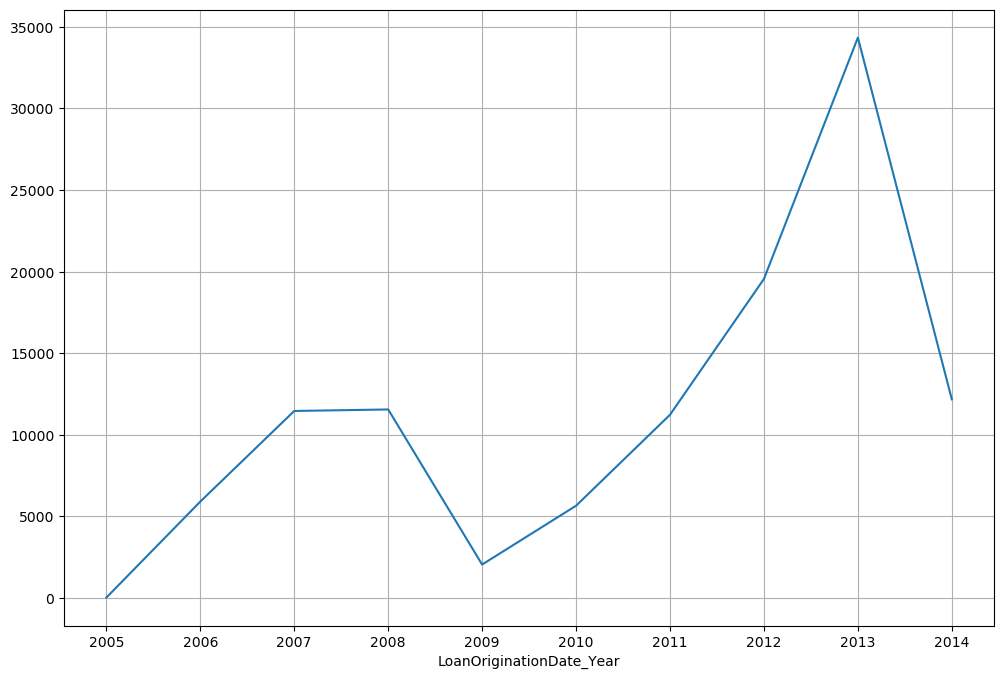

In [50]:
# Create a line plot of loan cases per every year
df_loan.groupby(['LoanOriginationDate_Year']).size().reset_index().rename(columns={0:'loan_counts'}).plot(x='LoanOriginationDate_Year', y='loan_counts', kind='line', figsize=(12,8), grid=True, legend=False, xticks=df_loan.groupby(['LoanOriginationDate_Year']).size().index);

The line chart showed the loan counts increased steadily after year 2011. The sudden fallback of year 2014 is due to the lack of data (our dataset ends at 2014-03-12), and we will create a second line chart to display the growth of loan counts of every quarter to remedy this problem.

In [51]:
# Extract year and quarter information from the LoanOriginationQuarter column
df_plot_line = df_loan.groupby(['LoanOriginationQuarter']).size().reset_index().rename(columns={0:'loan_counts'})
df_plot_line['quarter'] = df_plot_line.LoanOriginationQuarter.str.split(' ').apply(lambda x: x[0])
df_plot_line['year'] = df_plot_line.LoanOriginationQuarter.str.split(' ').apply(lambda x: x[1])

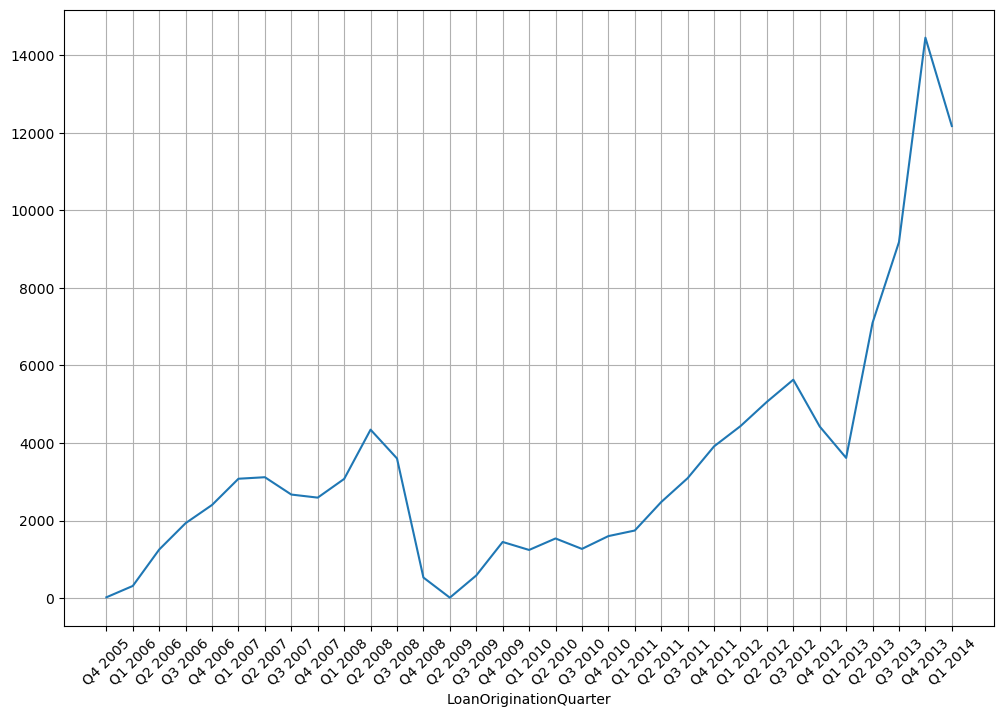

In [52]:
# Create a line plot of loan cases per every quarter
df_plot_line.sort_values(by=['year', 'quarter']).plot(x='LoanOriginationQuarter', y='loan_counts', kind='line', figsize=(12,8), grid=True, legend=False)

# https://stackoverflow.com/questions/51053450/pandas-plotting-skipping-xtick-labels
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(ticks=range(df_plot_line.shape[0]), labels=df_plot_line.sort_values(by=['year', 'quarter'])['LoanOriginationQuarter'], horizontalalignment="center", rotation=45);

When we split the unit of time from years to quarters, it becomes apparent that the number of loans per quarter increased sharply after 2013 Q1, and keeps on breaking highest record until 2014 Q1 (again, the data of 2014 Q1 is not a complete quarter anyway). Now we know there is indeed an escalation of borrowers (and maybe, people who are financially weak), perhaps we can try to create some adapted line plots to help us inspect the phenomenon we mentioned earlier.

## Multivariate Exploration

In this section we will concentrate on the following topics derived from the previous section:

- Find the chargedoff/defaulted rates by occupations, income ranges, and credit ratings
- Find the growth trends of loans by income ranges and credit ratings

In [53]:
def draw_heatmap_multivar(df, heatmap_xaxis, heatmap_yaxis, column_xaxis, column_yaxis, loan_status_code, x_tick_order):
    """
    Creates an adapted 2d categorical heatmap using designated facet variables

    Args:
        df - original source of data
        heatmap_xaxis - list of labels for creating internal dataframe
        heatmap_yaxis - list of labels for creating internal dataframe
        column_xaxis - dataframe column name for x-axis of heatmap
        column_yaxis - dataframe column name for y-axis of heatmap
        loan_status_code - the LoanStatus code we want to create heatmap against
        x_tick_order - specify the order of xticklabels we want to display
    Returns:
        None
    """
    # https://www.geeksforgeeks.org/creating-pandas-dataframe-using-list-of-lists/
    list_df = []

    for x in heatmap_xaxis:
        list_c = []
        for y in heatmap_yaxis:
            if df.query('`{}` == "{}" & `{}` == "{}"'.format(column_yaxis, y, column_xaxis, x)).shape[0] == 0:
                list_c.append(0)
            else:
                list_c.append(df.query('`{}` == "{}" & `{}` == "{}" & LoanStatus == "{}"'.format(column_yaxis, y, column_xaxis, x, loan_status_code)).shape[0] / df.query('`{}` == "{}" & `{}` == "{}"'.format(column_yaxis, y, column_xaxis, x)).shape[0] * 100)
        list_df.append(list_c)


    df_heatmap = pd.DataFrame(data=list_df, index=heatmap_xaxis, columns=heatmap_yaxis)

    default_rate = df_heatmap.transpose().reindex(columns=x_tick_order).sort_index().sort_values(by=x_tick_order)

    plt.figure(figsize=(12,20))

    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    # https://www.geeksforgeeks.org/how-to-adjust-the-position-of-a-matplotlib-colorbar/
    ax = sb.heatmap(default_rate, cmap="viridis", annot=True, fmt='.4f', cbar=True, cbar_kws={"orientation": "horizontal", "pad": 0.05, "label" : "{} Rate".format(loan_status_code)})

    # https://stackoverflow.com/questions/55458260/python-how-to-have-the-axis-ticks-in-both-top-and-bottom-left-and-right-of-sns
    ax.tick_params(right=True, top=True, labelright=True, labeltop=True,rotation=0)

    for t in ax.texts: t.set_text(t.get_text() + '%')

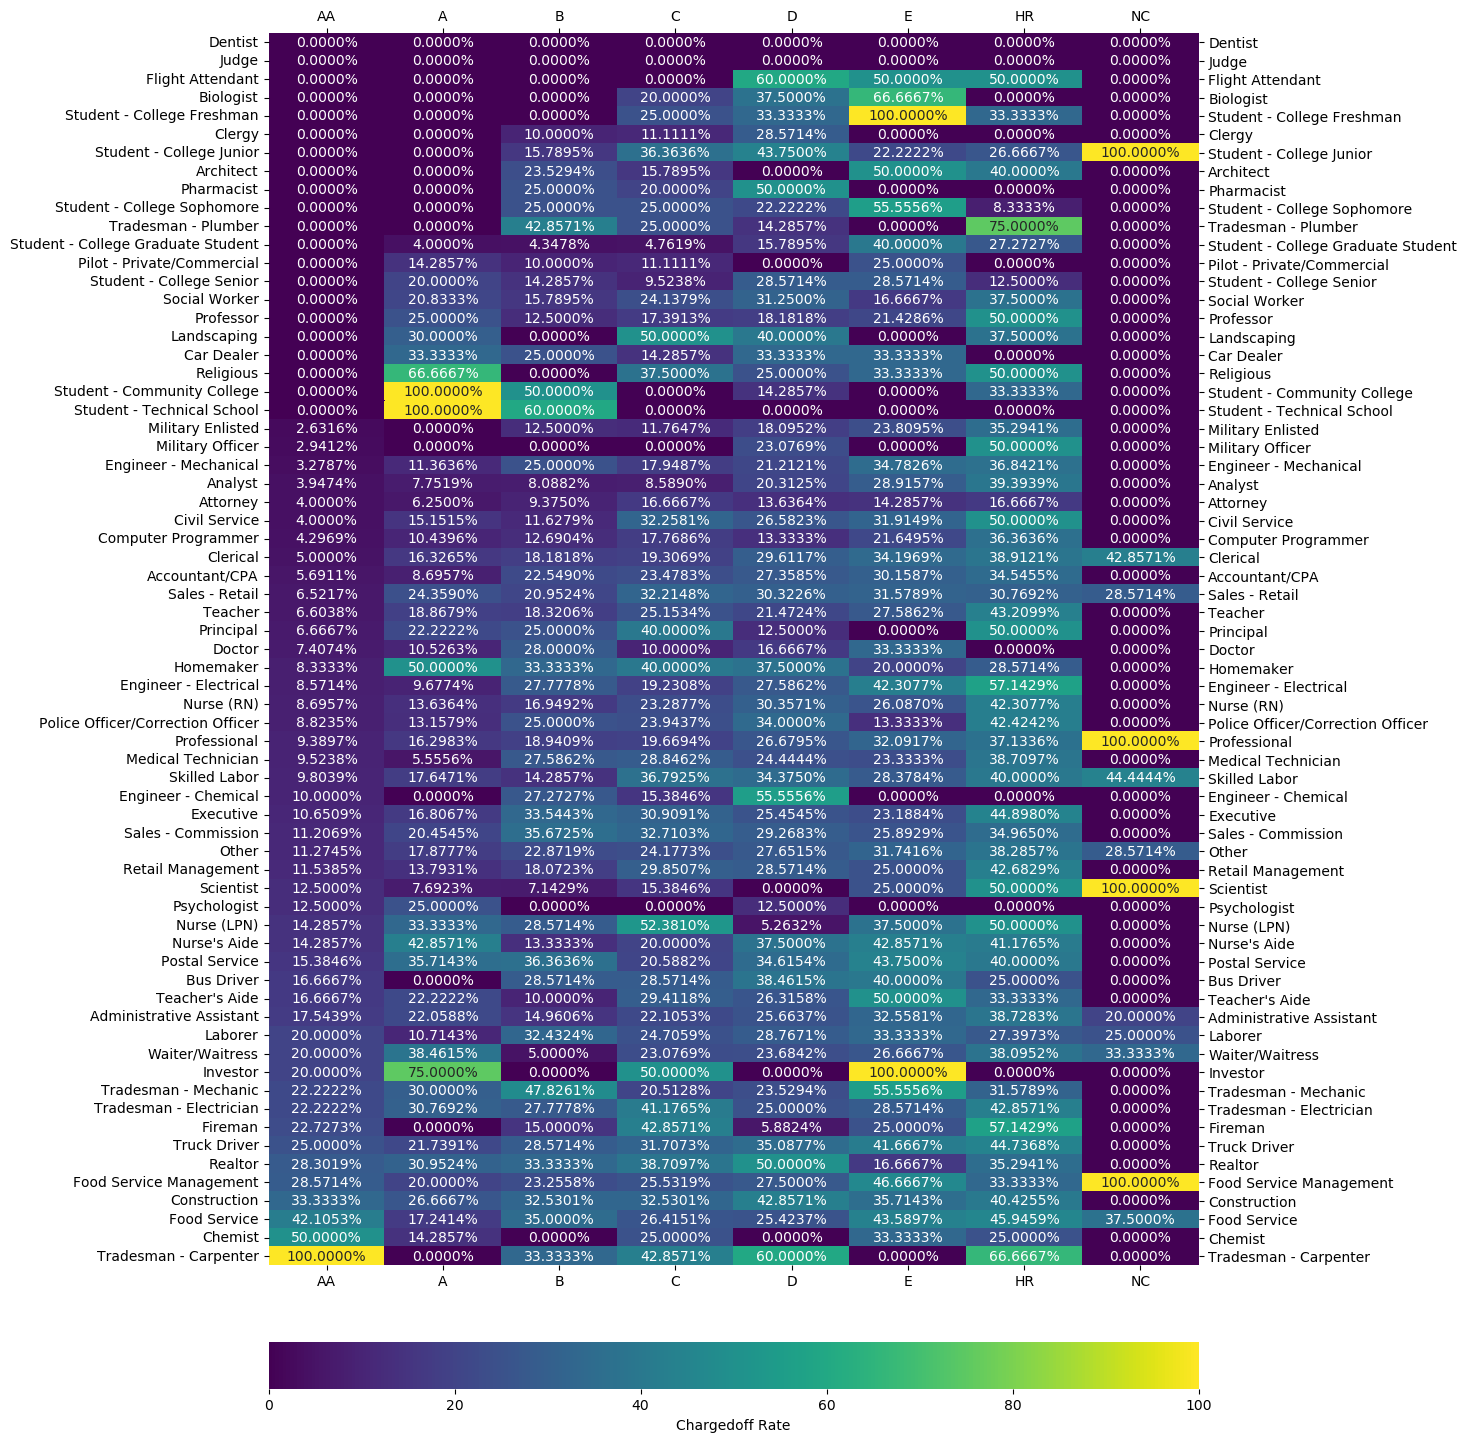

In [54]:
occupation = df_loan.Occupation.value_counts().index.tolist()
credit_grade = df_loan['CreditGrade'].value_counts().index.tolist()
x_tick_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
draw_heatmap_multivar(df_loan, credit_grade, occupation, 'CreditGrade', 'Occupation', 'Chargedoff', x_tick_order)

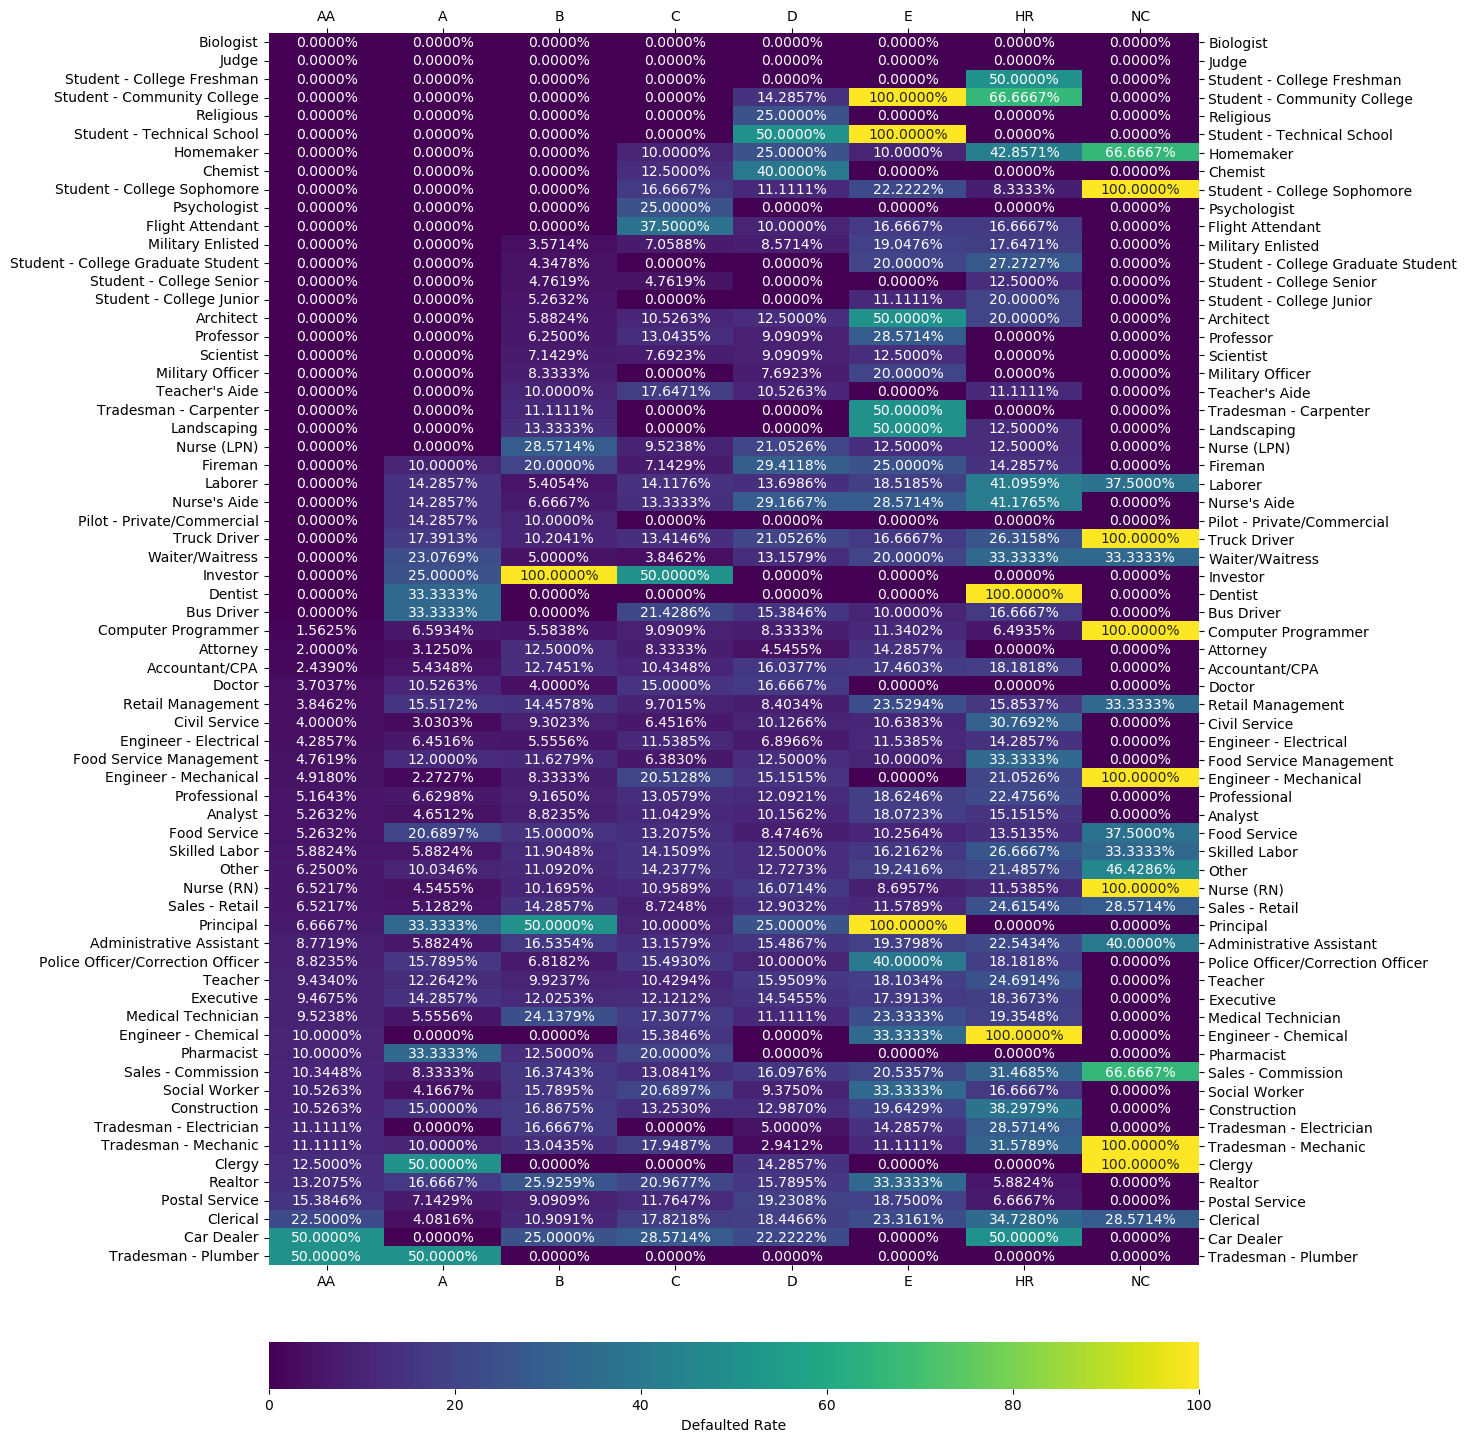

In [55]:
occupation = df_loan.Occupation.value_counts().index.tolist()
credit_grade = df_loan['CreditGrade'].value_counts().index.tolist()
x_tick_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
draw_heatmap_multivar(df_loan, credit_grade, occupation, 'CreditGrade', 'Occupation', 'Defaulted', x_tick_order)

During the period before July 2009 website reopened, both the chargedoff and defaulted loan rates were rampant. Only a few number of occupations with AA credit ratings could be considered as reliable investments.

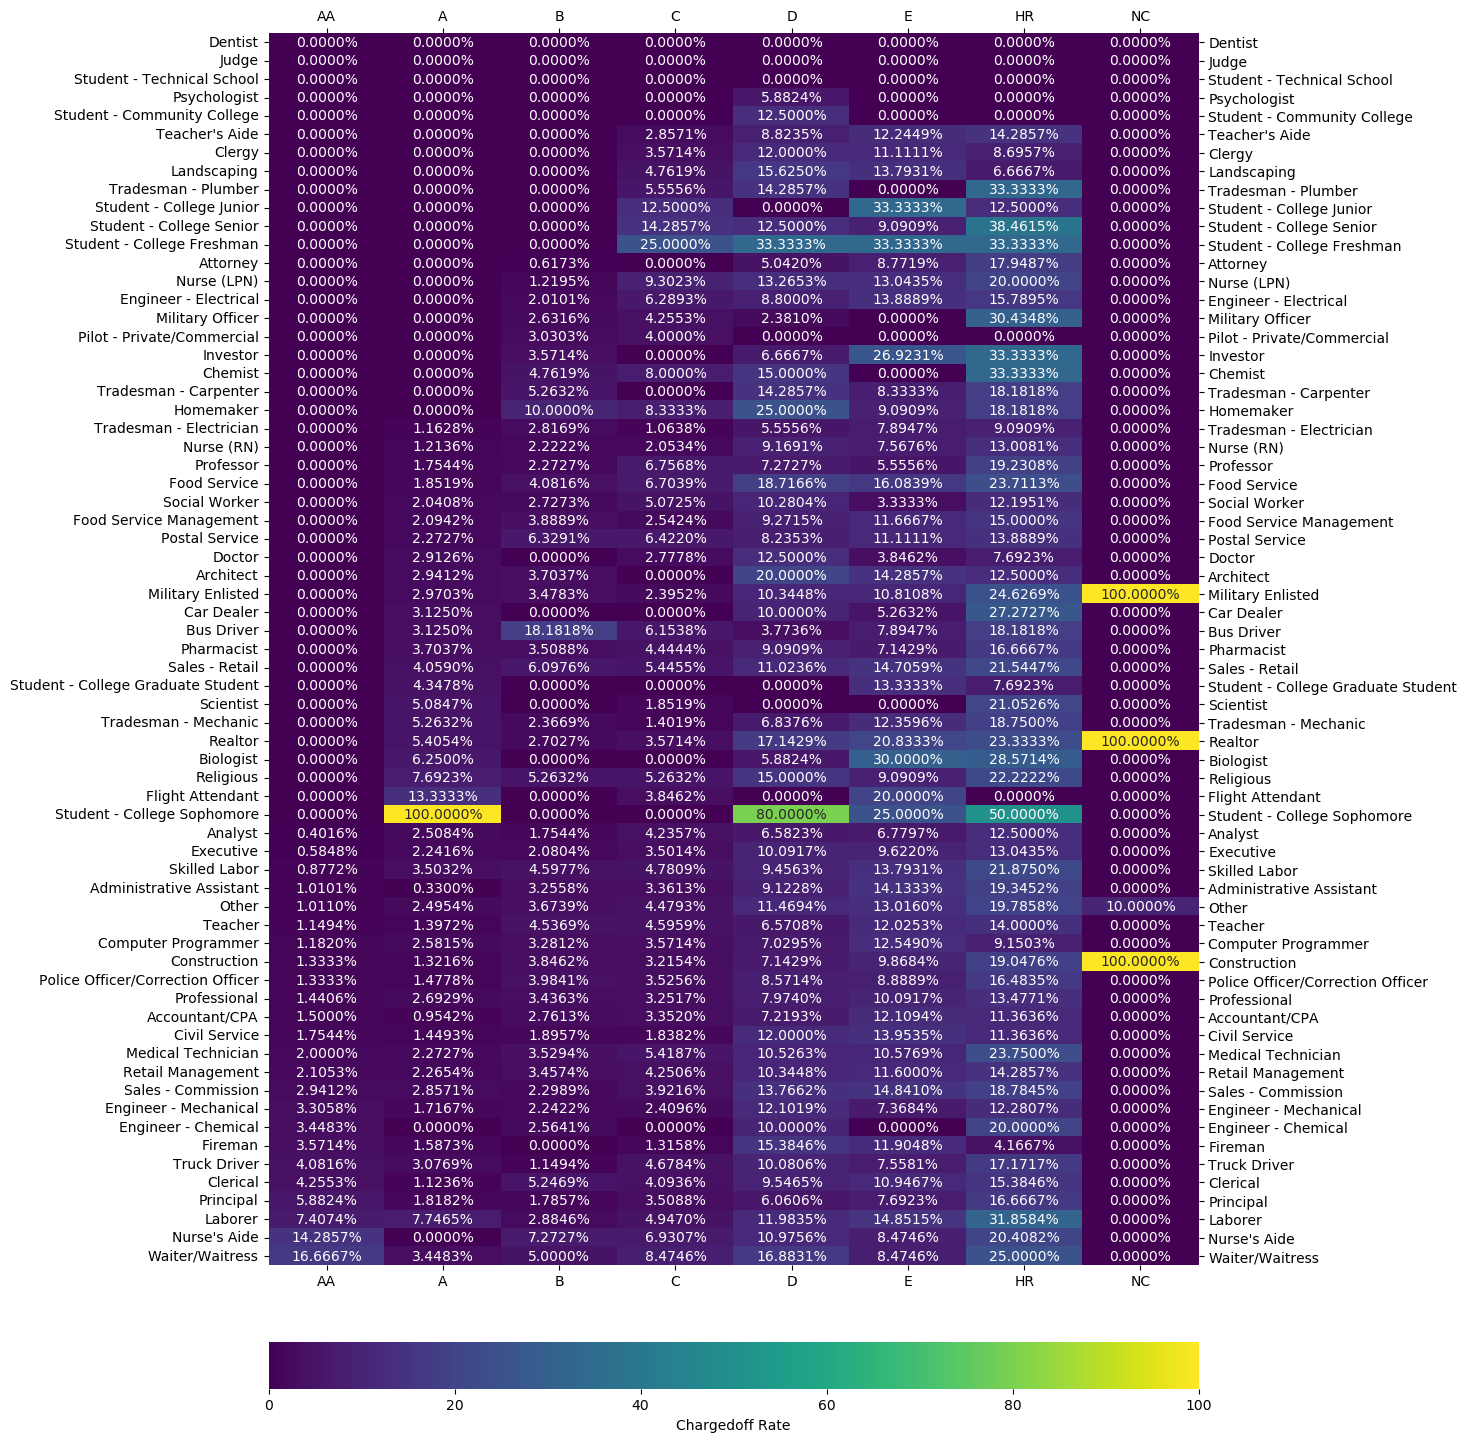

In [56]:
occupation = df_loan.Occupation.value_counts().index.tolist()
prosper_rating = df_loan['ProsperRating (Alpha)'].value_counts().index.tolist()
x_tick_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
draw_heatmap_multivar(df_loan, prosper_rating, occupation, 'ProsperRating (Alpha)', 'Occupation', 'Chargedoff', x_tick_order)

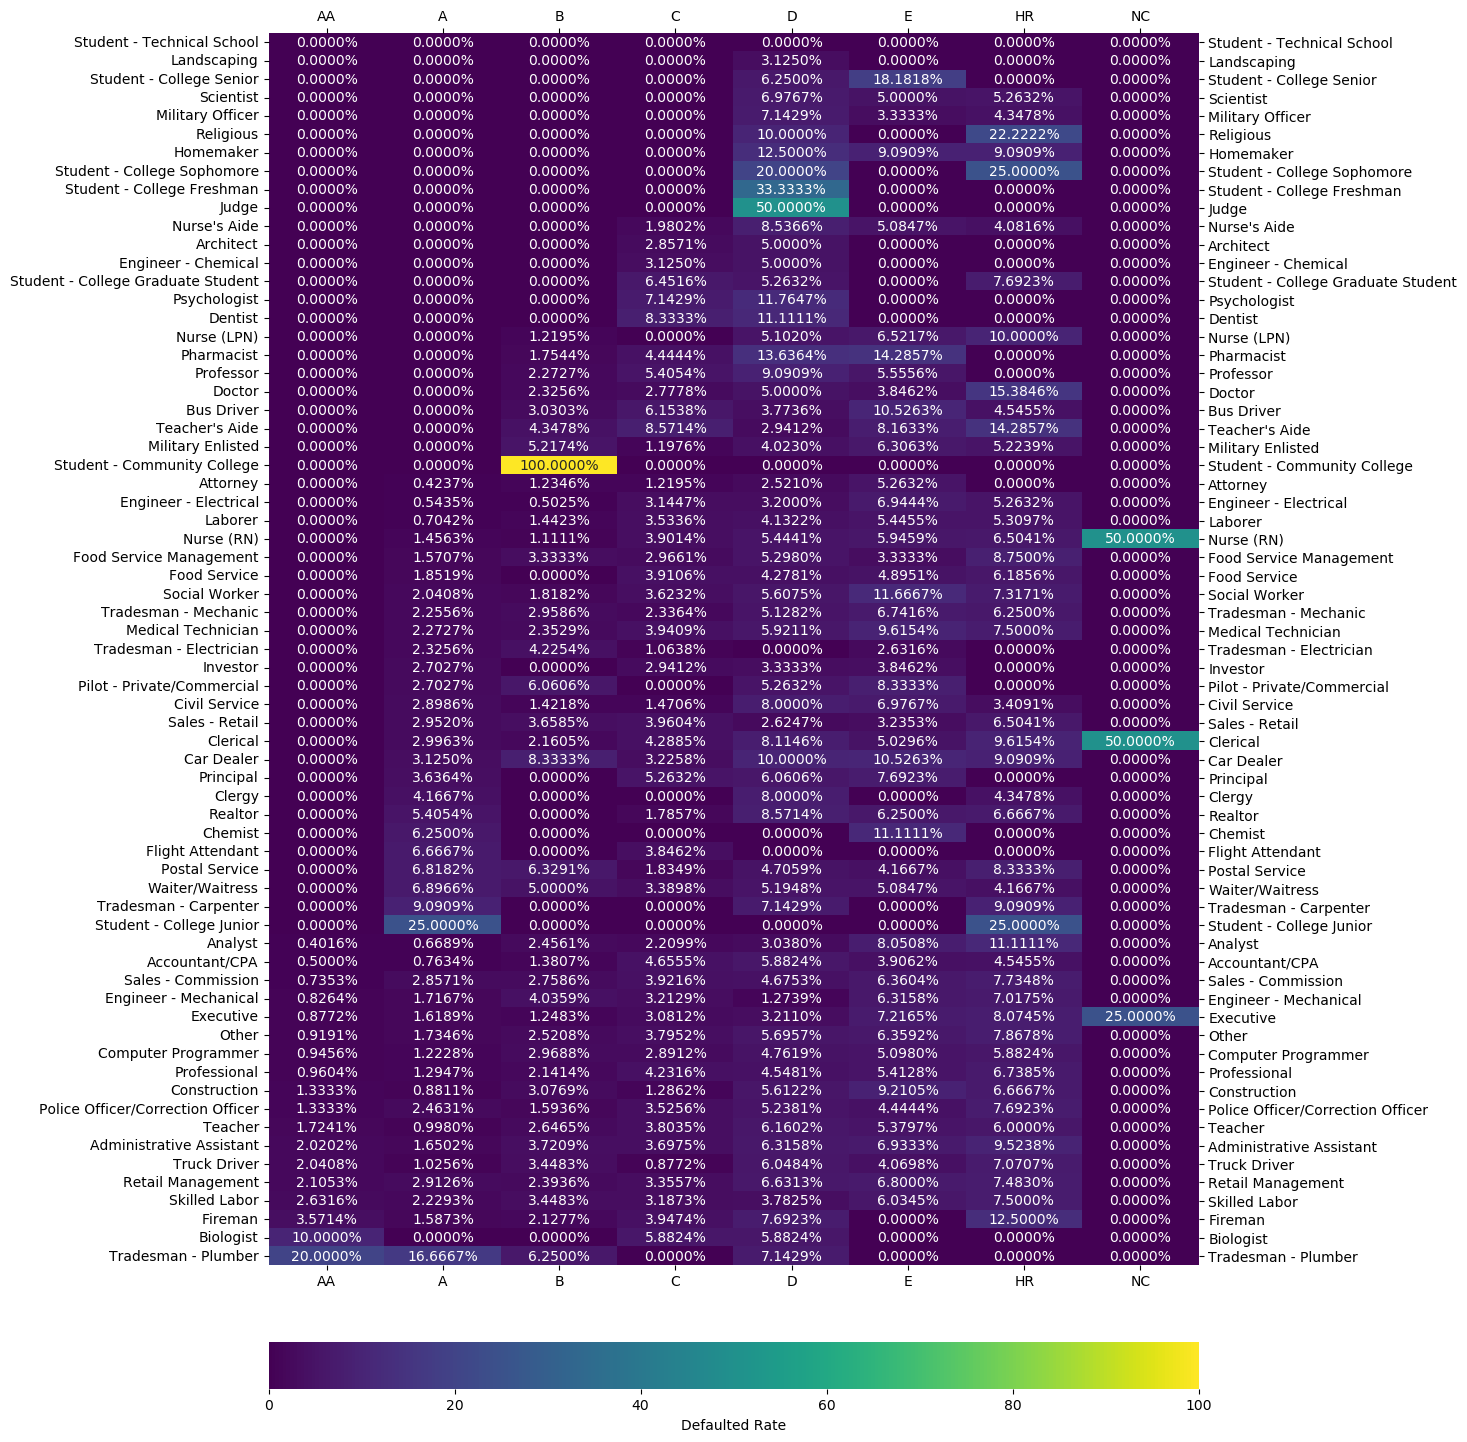

In [57]:
occupation = df_loan.Occupation.value_counts().index.tolist()
prosper_rating = df_loan['ProsperRating (Alpha)'].value_counts().index.tolist()
x_tick_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
draw_heatmap_multivar(df_loan, prosper_rating, occupation, 'ProsperRating (Alpha)', 'Occupation', 'Defaulted', x_tick_order)

After July 2009 Prosper relaunch, both the chargedoff and defaulted loan rates improved dramatically, making the Prosper marketplace to become a stable platform of peer-to-peer lending. However, we should still pay attention to some occupations that have a high chargedoff/defaulted rate even when they carry a good Prosper Rating such as AA or A.

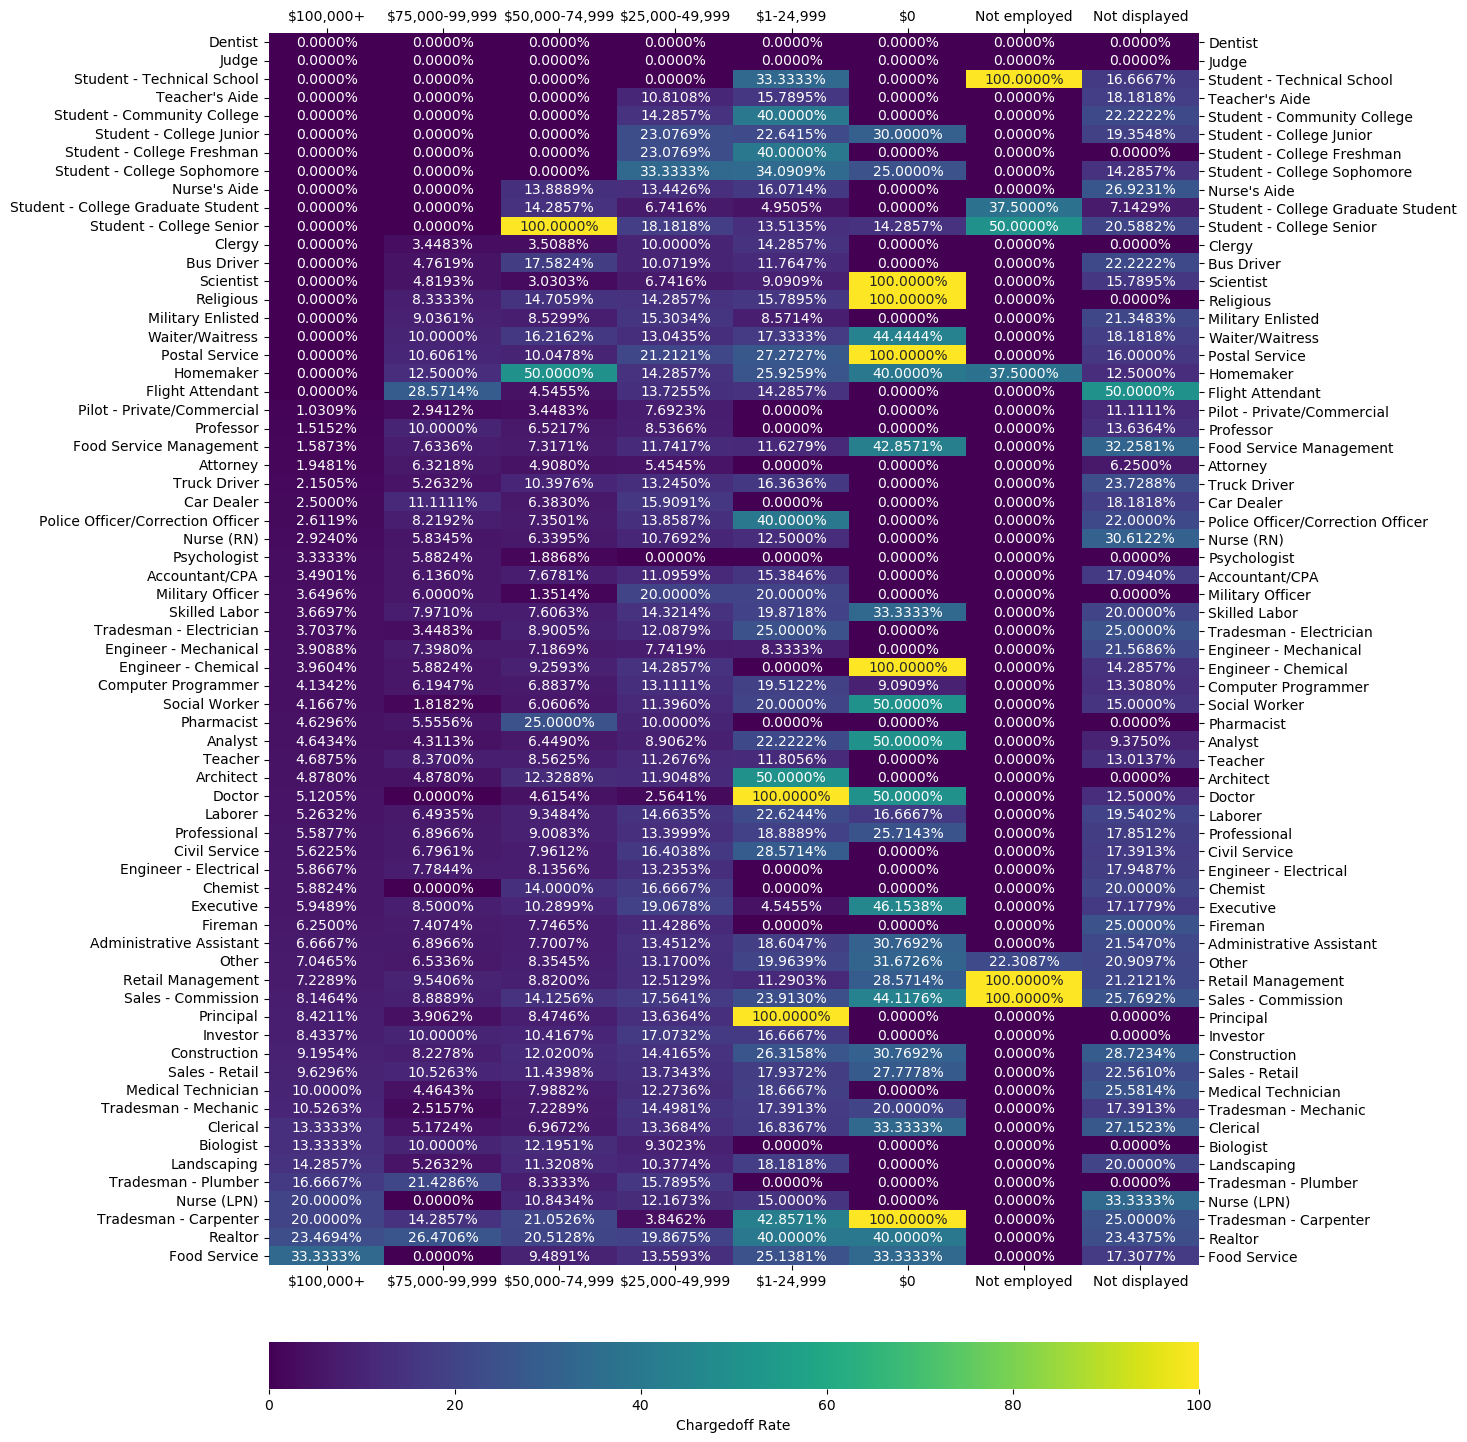

In [58]:
occupation = df_loan.Occupation.value_counts().index.tolist()
income_range = df_loan['IncomeRange'].value_counts().index.tolist()
x_tick_order = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed', 'Not displayed']
draw_heatmap_multivar(df_loan, income_range, occupation, 'IncomeRange', 'Occupation', 'Chargedoff', x_tick_order)

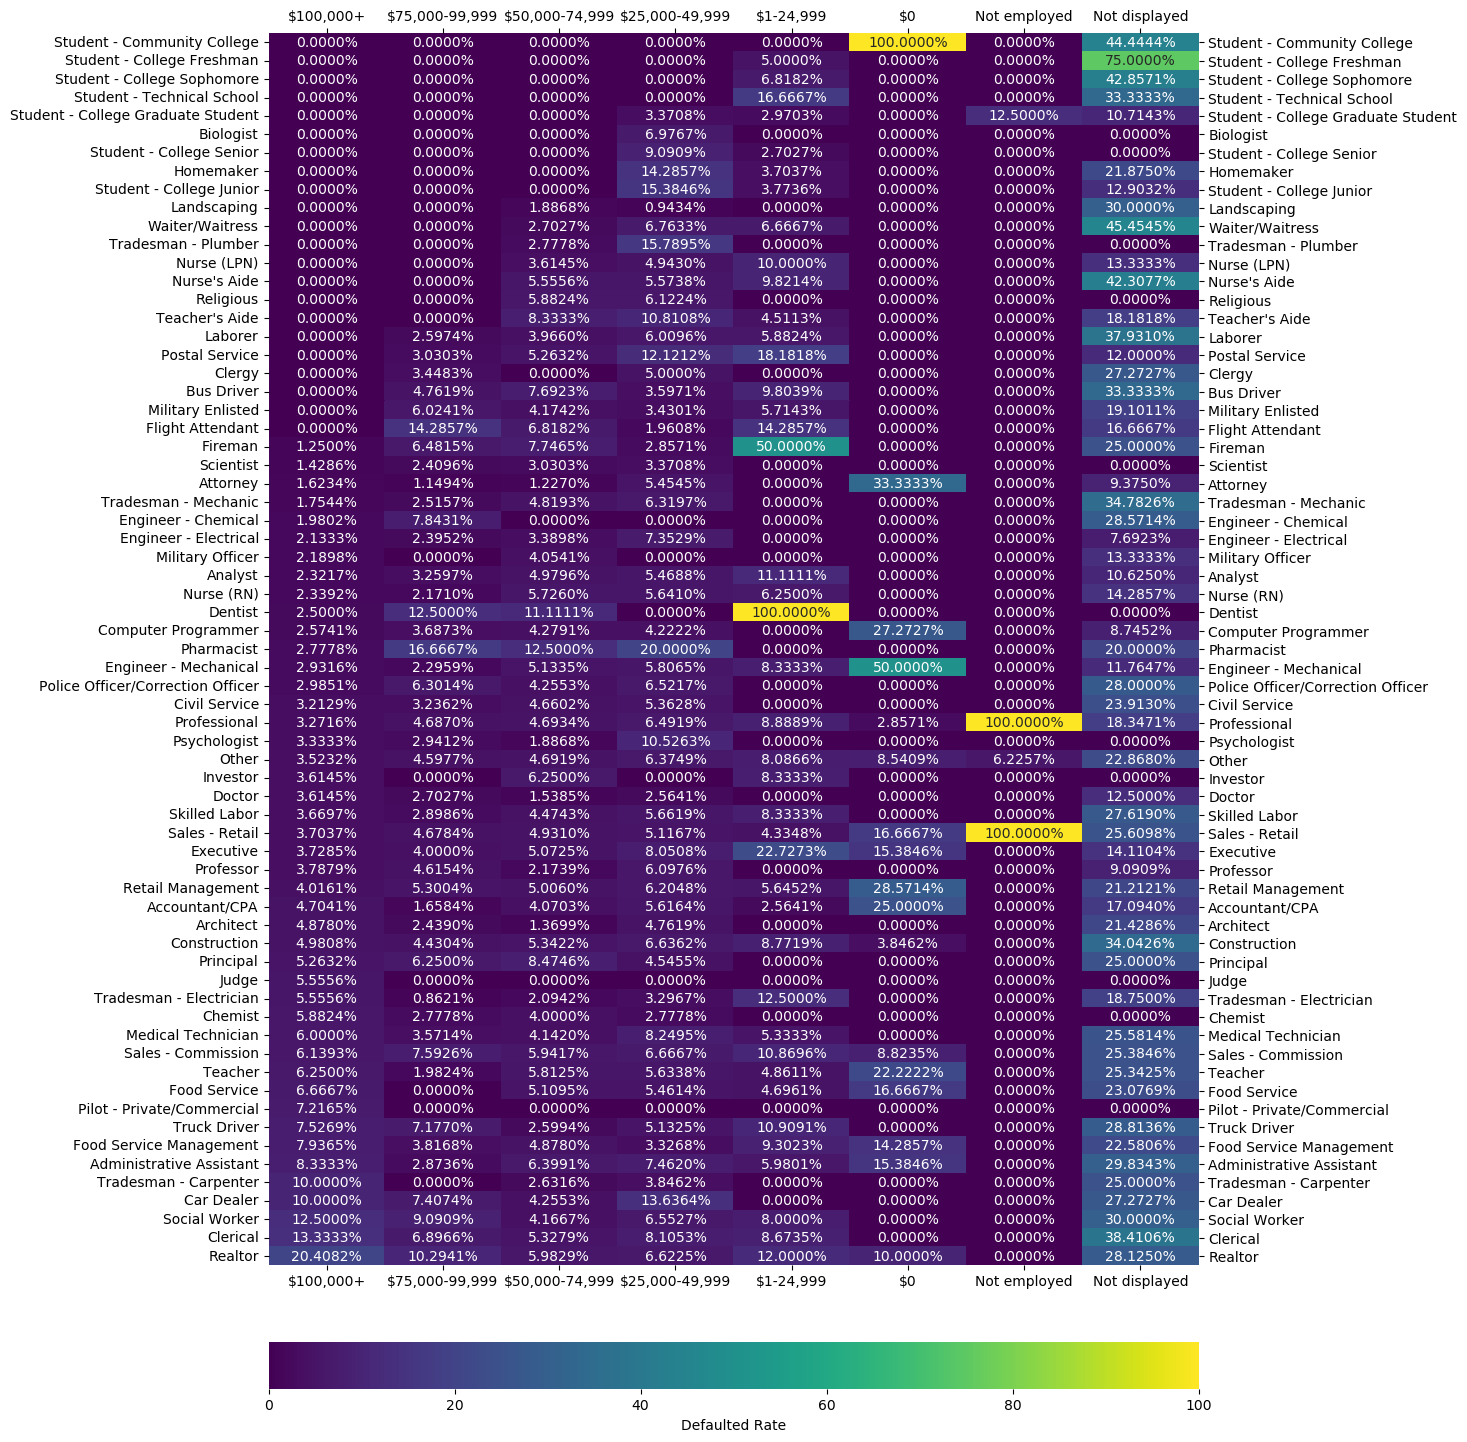

In [59]:
occupation = df_loan.Occupation.value_counts().index.tolist()
income_range = df_loan['IncomeRange'].value_counts().index.tolist()
x_tick_order = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed', 'Not displayed']
draw_heatmap_multivar(df_loan, income_range, occupation, 'IncomeRange', 'Occupation', 'Defaulted', x_tick_order)

Unlike the credit rating columns which separate the dataset to two mutual exclusive portions, the income ranges accept data generated before and after July 2009 as a whole. And from the heatmap we created above, we can see it is obvious that the computed chargedoff/defaulted rates are heavily influenced by data generated before July 2009 (similar to a mean value being affected by outliers). We will try to create the same heatmaps using only data generated after Prosper reopened their website and see the differences.

In [60]:
# Find the last date of data generated before Prosper relaunched their website
df_loan.query('CreditGrade.isnull() == False').LoanOriginationDate.max()

datetime.date(2009, 5, 14)

In [61]:
test = df_loan.loc[df_loan['LoanOriginationDate'] > df_loan.query('CreditGrade.isnull() == False').LoanOriginationDate.max()]

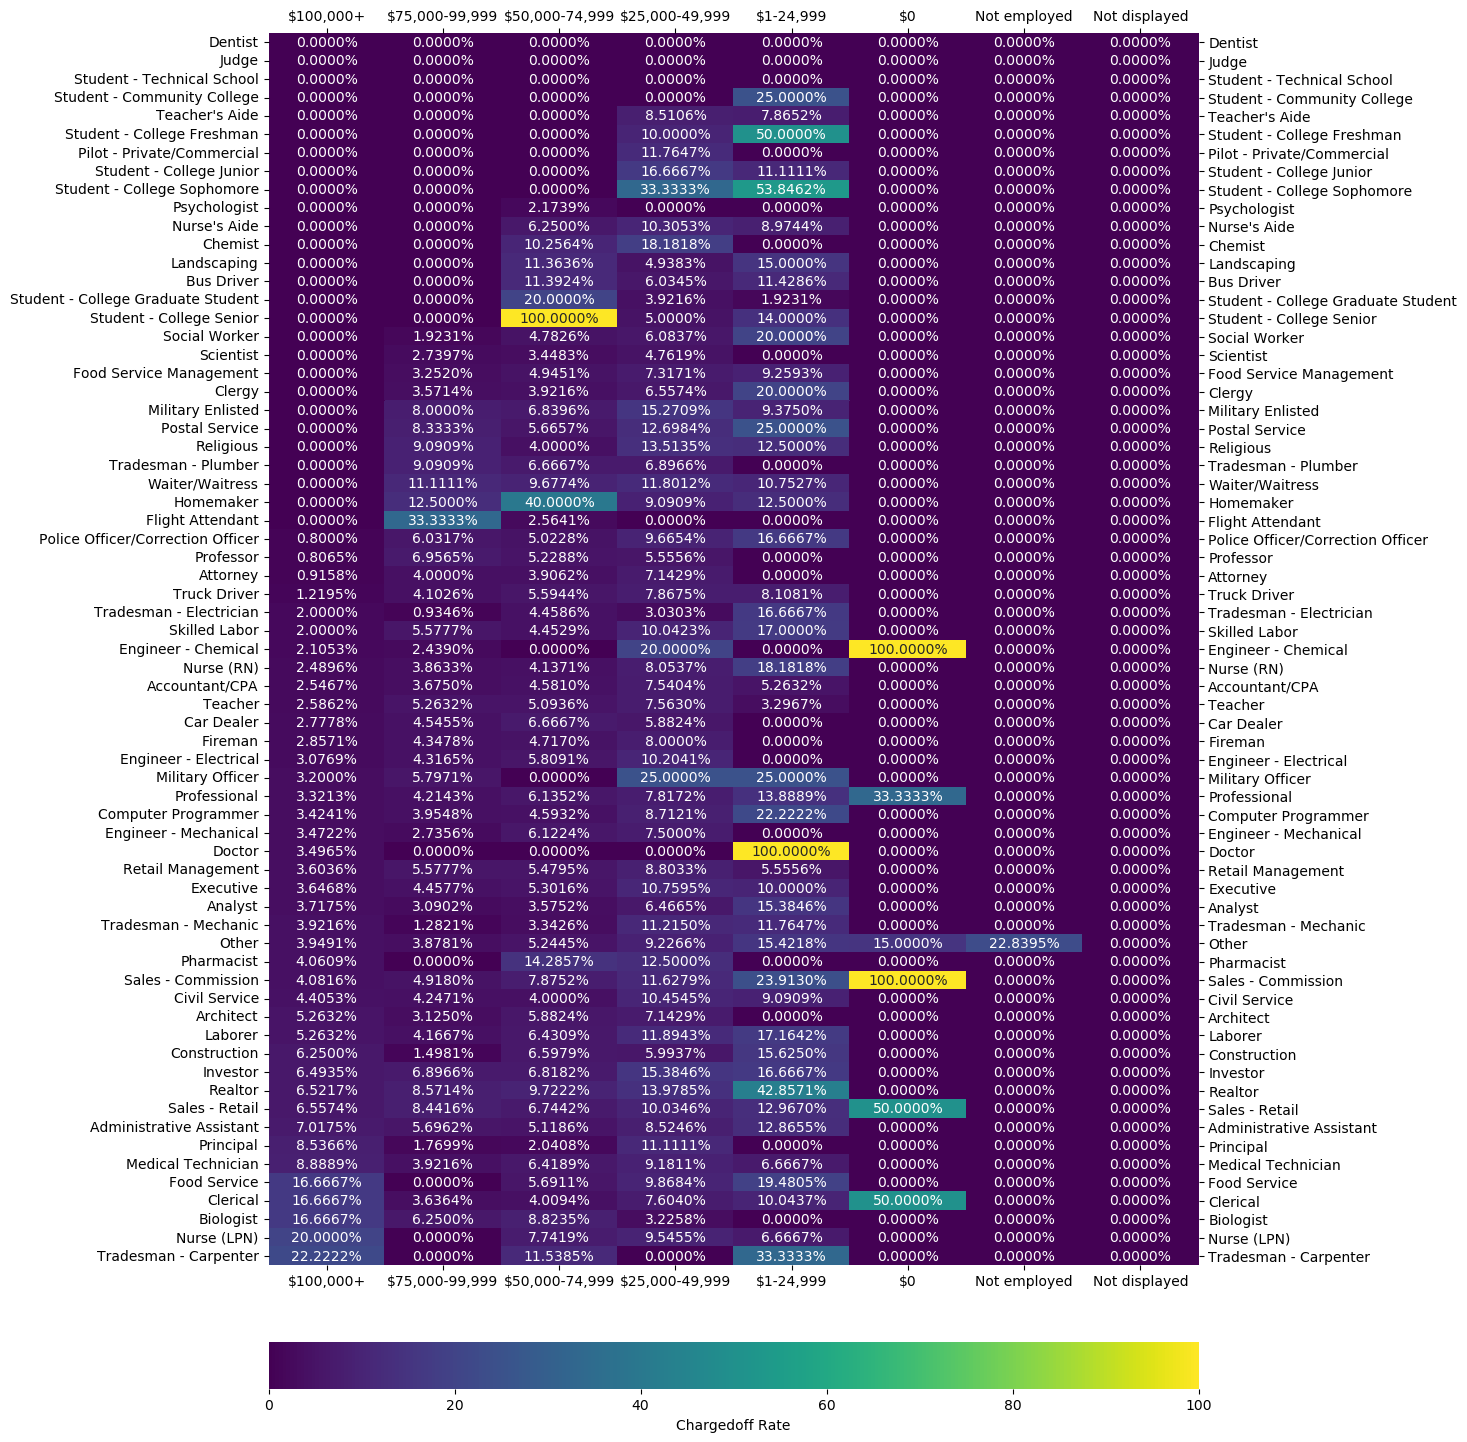

In [62]:
occupation = df_loan.Occupation.value_counts().index.tolist()
income_range = df_loan['IncomeRange'].value_counts().index.tolist()
x_tick_order = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed', 'Not displayed']
draw_heatmap_multivar(test, income_range, occupation, 'IncomeRange', 'Occupation', 'Chargedoff', x_tick_order)

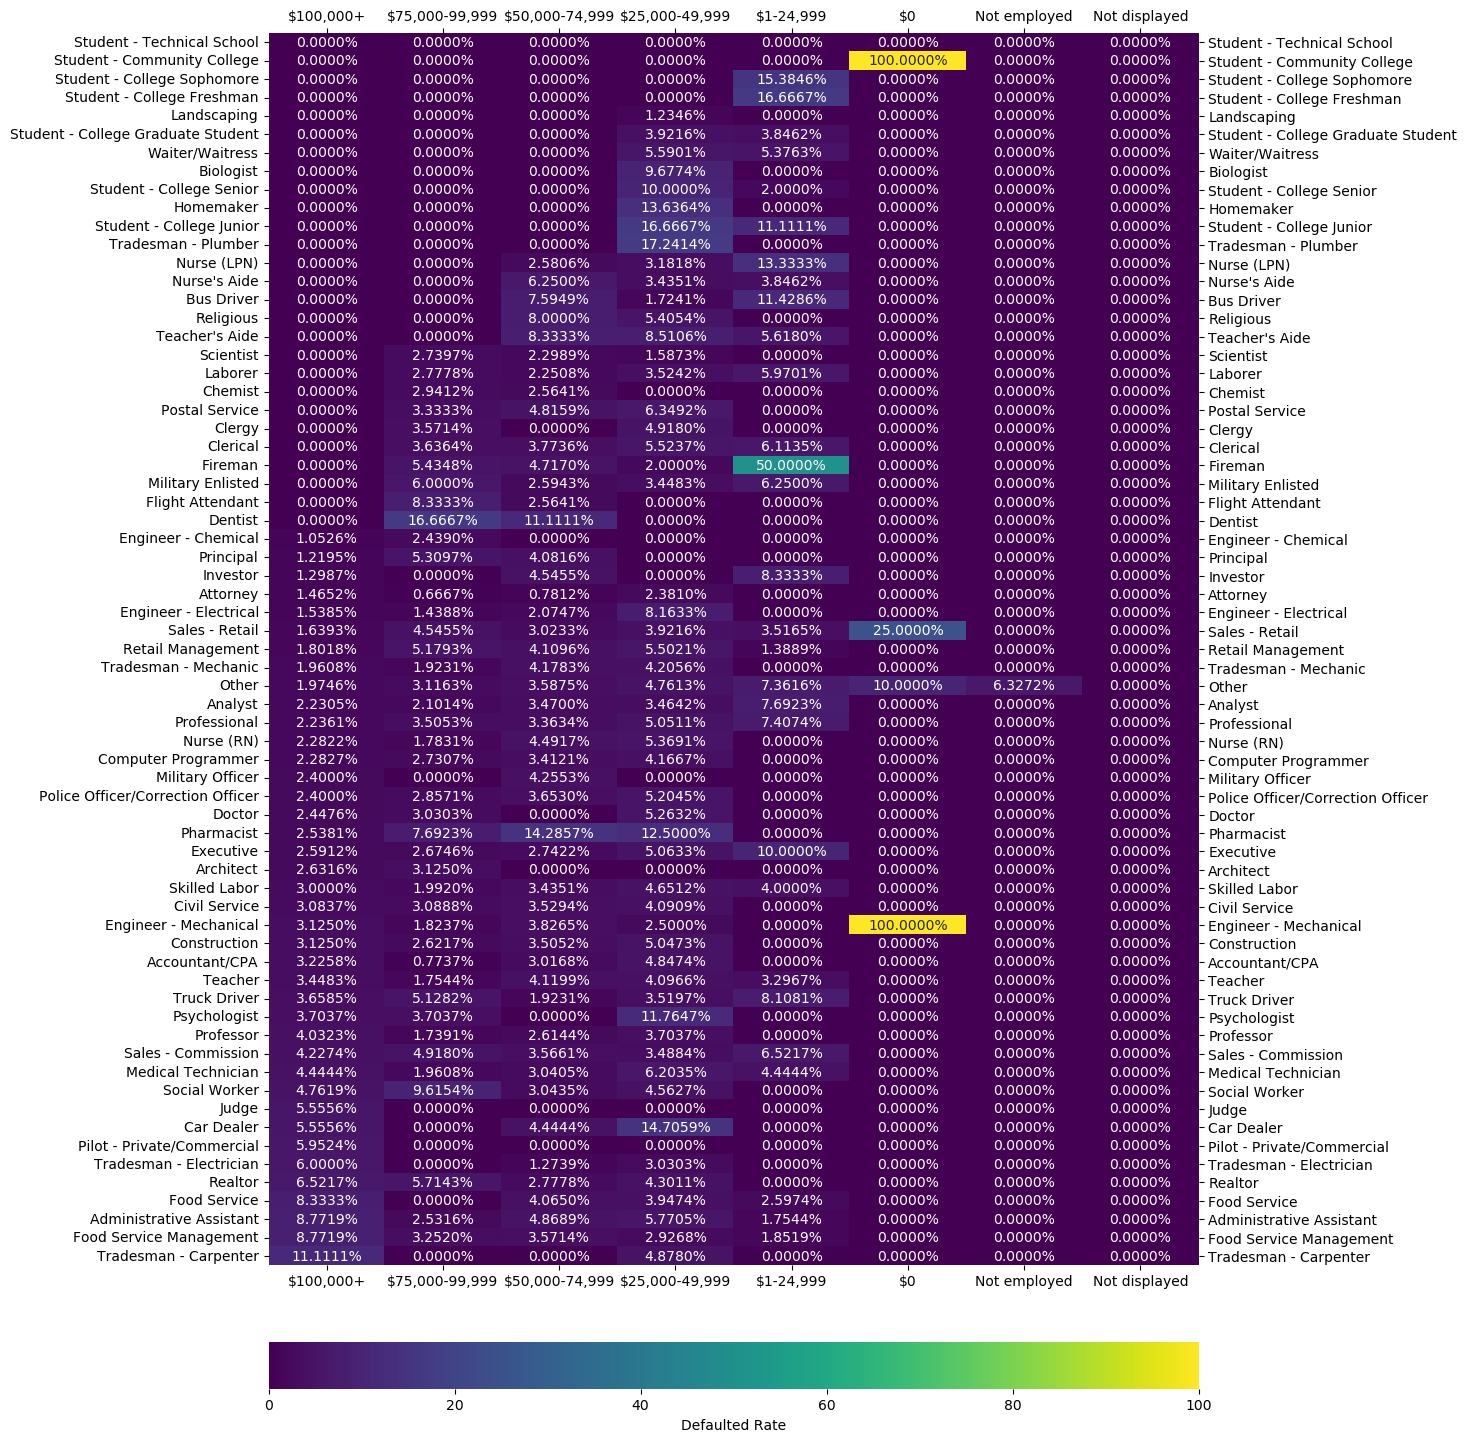

In [63]:
occupation = df_loan.Occupation.value_counts().index.tolist()
income_range = df_loan['IncomeRange'].value_counts().index.tolist()
x_tick_order = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed', 'Not displayed']
draw_heatmap_multivar(test, income_range, occupation, 'IncomeRange', 'Occupation', 'Defaulted', x_tick_order)

We can see that after July 2009, there is only a few occupations with their income ranges belong to either "\$0" or "Not Employed" appeared in the heatmap, which means Prosper tightened their measures of credit ratings and risk control after their relaunch.

Next we will examine the growth trends of loans by credit ratings and income ranges.

In [64]:
# https://stackoverflow.com/questions/30899572/merge-multiple-pandas-columns-into-new-column
df_loan['Credit_Rating_Stacked'] = df_loan[['CreditGrade', 'ProsperRating (Alpha)']].stack().values

In [65]:
df_line_credit = df_loan.groupby(['LoanOriginationQuarter', 'Credit_Rating_Stacked']).size().reset_index().pivot(index='LoanOriginationQuarter', columns='Credit_Rating_Stacked', values=0).fillna(0).astype('int64')
df_line_credit['Total'] = df_line_credit.sum(axis=1)

for r in ['A', 'AA', 'B', 'C', 'D', 'E', 'HR', 'NC']:
    df_line_credit['rate_{}'.format(r)] = df_line_credit[r] / df_line_credit['Total']

df_line_credit.reset_index(inplace=True)
df_line_credit['quarter'] = df_line_credit.LoanOriginationQuarter.str.split(' ').apply(lambda x: x[0])
df_line_credit['year'] = df_line_credit.LoanOriginationQuarter.str.split(' ').apply(lambda x: x[1])

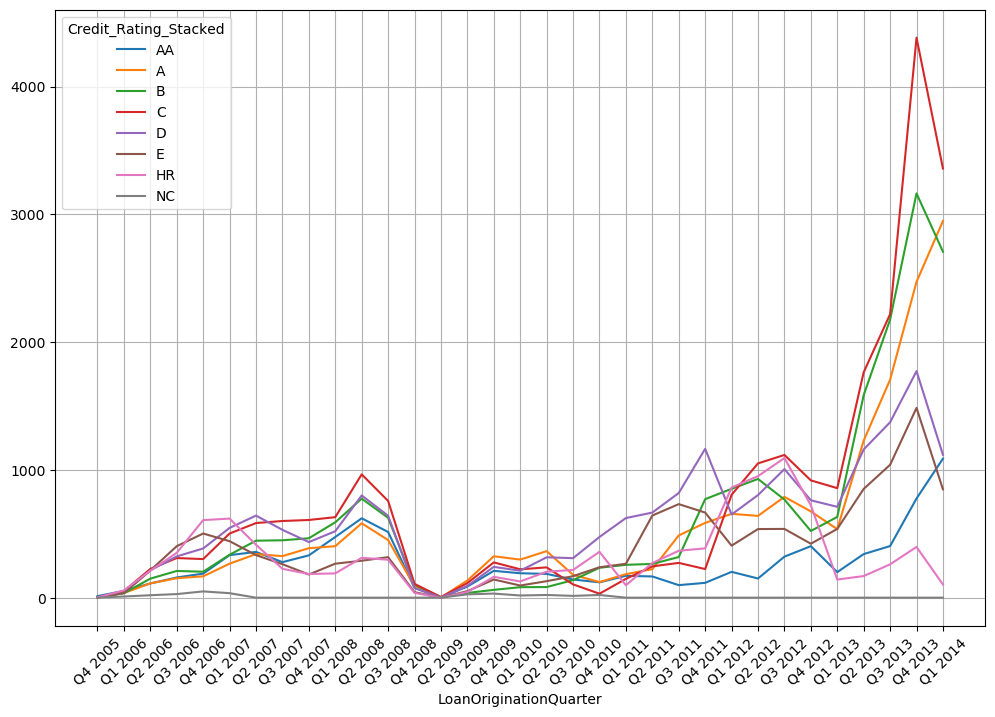

In [66]:
df_line_credit.sort_values(by=['year', 'quarter']).plot(x='LoanOriginationQuarter', y=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'], kind='line', figsize=(12,8), grid=True, legend=True)
plt.xticks(ticks=range(df_line_credit.shape[0]), labels=df_line_credit.sort_values(by=['year', 'quarter'])['LoanOriginationQuarter'], horizontalalignment="center", rotation=45);

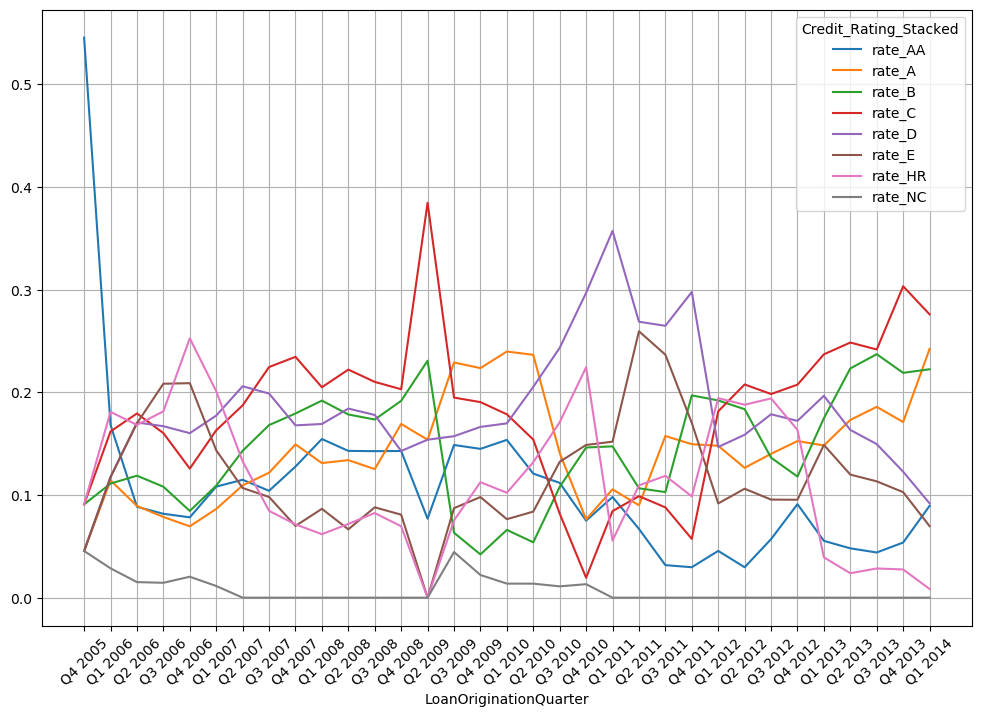

In [67]:
df_line_credit.sort_values(by=['year', 'quarter']).plot(x='LoanOriginationQuarter', y=['rate_AA', 'rate_A', 'rate_B', 'rate_C', 'rate_D', 'rate_E', 'rate_HR', 'rate_NC'], kind='line', figsize=(12,8), grid=True, legend=True)
plt.xticks(ticks=range(df_line_credit.shape[0]), labels=df_line_credit.sort_values(by=['year', 'quarter'])['LoanOriginationQuarter'], horizontalalignment="center", rotation=45);

After July 2009 relaunch, the D rating loans were the most common loan listings in the Prosper marketplace ranging from 2010 Q3 to 2011 Q4. Starting from 2012 Q1, the C rating loans becomes the mainstream of the loan marketplace, followed by the B rating loans.

In [68]:
df_line_income = df_loan.groupby(['LoanOriginationQuarter', 'IncomeRange']).size().reset_index().pivot(index='LoanOriginationQuarter', columns='IncomeRange', values=0).fillna(0).astype('int64')
df_line_income['Total'] = df_line_income.sum(axis=1)

for r in ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed', 'Not displayed']:
    df_line_income['rate_{}'.format(r)] = df_line_income[r] / df_line_income['Total']

df_line_income.reset_index(inplace=True)
df_line_income['quarter'] = df_line_income.LoanOriginationQuarter.str.split(' ').apply(lambda x: x[0])
df_line_income['year'] = df_line_income.LoanOriginationQuarter.str.split(' ').apply(lambda x: x[1])

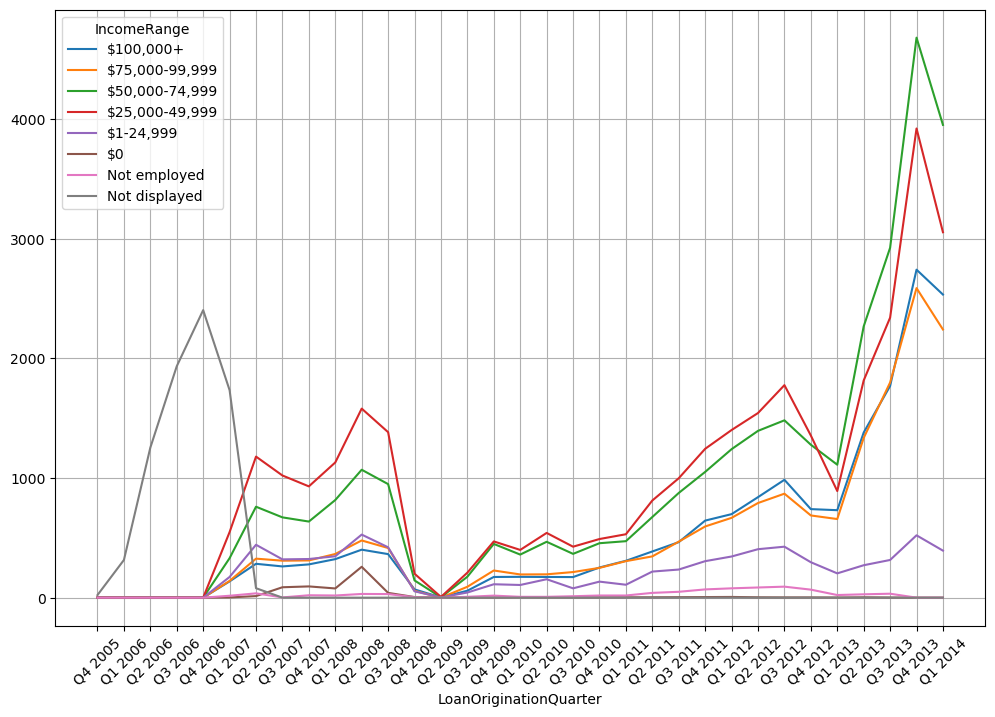

In [69]:
df_line_income.sort_values(by=['year', 'quarter']).plot(x='LoanOriginationQuarter', y=['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed', 'Not displayed'], kind='line', figsize=(12,8), grid=True, legend=True)
plt.xticks(ticks=range(df_line_income.shape[0]), labels=df_line_income.sort_values(by=['year', 'quarter'])['LoanOriginationQuarter'], horizontalalignment="center", rotation=45);

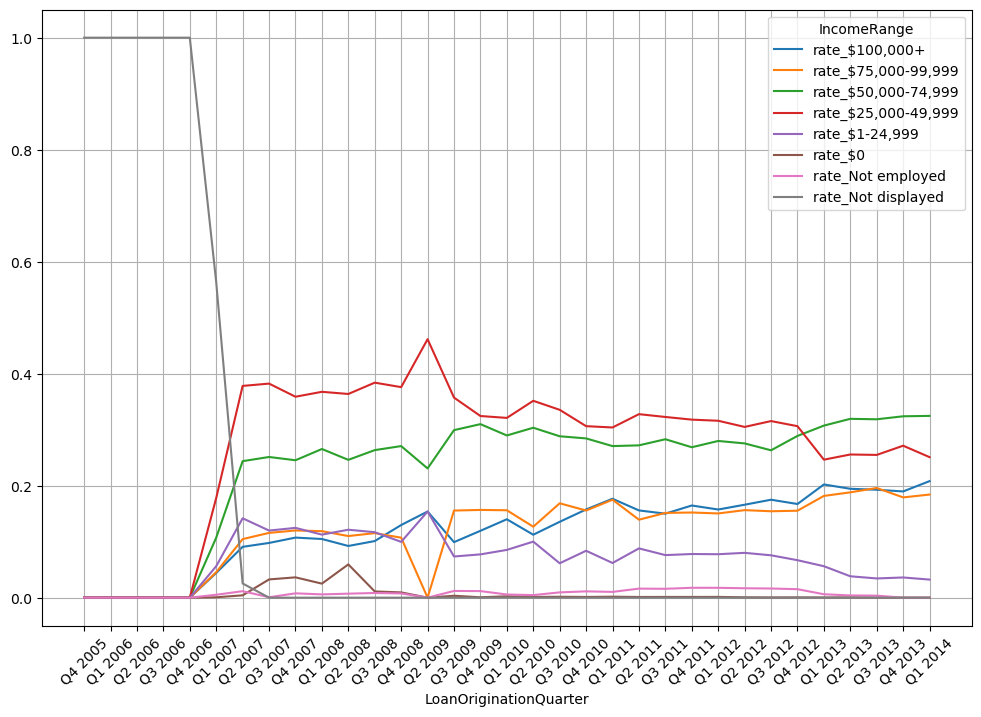

In [70]:
df_line_income.sort_values(by=['year', 'quarter']).plot(x='LoanOriginationQuarter', y=['rate_$100,000+', 'rate_$75,000-99,999', 'rate_$50,000-74,999', 'rate_$25,000-49,999', 'rate_$1-24,999', 'rate_$0', 'rate_Not employed', 'rate_Not displayed'], kind='line', figsize=(12,8), grid=True, legend=True)
plt.xticks(ticks=range(df_line_income.shape[0]), labels=df_line_income.sort_values(by=['year', 'quarter'])['LoanOriginationQuarter'], horizontalalignment="center", rotation=45);

In constrast to the growth trends of loans by credit ratings, the growth trends of loans by income ranges are less fluctuating. We can see that even after July 2009 relaunch, the borrowers with their income ranges fall in either "\\$25,000-49,999" or "\\$50,000,74,999" always remained as the primary groups of borrowers in the marketplace.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

When we pair either credit ratings or income ranges together with the chargedoff/default rates, not only can we rule out many overlooked risky occupations (those with high chargedoff/defaulted rates even when they carry AA or A ratings or with high income ranges), but also we can confirm the same trend observed in previous sections. For example:

- We know the overall chargedoff/defaulted rates are soaring during the period before July 2009, and the same result can also be observed in the adapted 2d heatmap of the *CreditGrade* column.
- We know the overall chargedoff/defaulted rates become steady for loans with rating ranges within AA-C after July 2009, and the same tendencies can also be distinguished in the adapted 2d heatmap of the *ProsperRating (Alpha)* column.
- We can see the overall chargedoff/defaulted rates are relatively stable when income ranges is above \$50,000, and the same overview is reflected in the adapted 2d heatmap, too.

### Were there any interesting or surprising interactions between features?

It is revealed that most of the borrowers in the marketplace are people with low to moderate incomes, and this is not only an overall result (the result we already saw in the section of univariate exploration), but also a persistent ongoing trend, indicating that the Prosper marketplace is always a potentially risky choice of investment, because most of the debtors in the market are financially weak.